# Extraccion Transformacion y Carga (ETL) y Analisis Exploratorio de Datos (EDA)

Mediante la exploración detallada del conjunto de datos proporcionado por el Observatorio de Movilidad y Seguridad Vial (OMSV), se busca identificar patrones, tendencias y factores clave que contribuyen a la ocurrencia de siniestros en la Ciudad de Buenos Aires. Este análisis preliminar aporta valiosa informacion para el diseño del dashboard, la definición de KPIs, asi tambien como para definir politicas y medidas preventivas para reducir el número de víctimas fatales en siniestros viales en la ciudad.

### Se importan las librerías necesarias para los procesos de ETL y EDA

In [460]:
# Importar librerías
import pandas as pd # Importa la librería pandas para el manejo de datos
import numpy as np # Importa la librería numpy para el manejo de datos
import calendar # Importa la librería calendar para trabajar con fechas
import locale # Importa la librería locale para configurar la configuración regional
import seaborn as sns # Importa la librería seaborn para la visualización de datos
import matplotlib.pyplot as plt # Importa la librería matplotlib.pyplot para la generación de gráficos
from datetime import datetime # Importa la clase datetime del módulo datetime para trabajar con fechas y horas
import warnings # Importa la función filterwarnings del módulo warnings para ignorar las advertencias
warnings.filterwarnings("ignore")

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [461]:
%pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


## **ETL**

Extracción de los datos desde un archivo xlsx, que contiene las hojas HECHOS y VICTIMAS.

In [462]:
hechos = pd.read_excel('homicidios.xlsx', sheet_name="HECHOS")

### Exploración Dataframe `hechos`

In [463]:
hechos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     696 non-null    object        
 1   N_VICTIMAS             696 non-null    int64         
 2   FECHA                  696 non-null    datetime64[ns]
 3   AAAA                   696 non-null    int64         
 4   MM                     696 non-null    int64         
 5   DD                     696 non-null    int64         
 6   HORA                   696 non-null    object        
 7   HH                     696 non-null    object        
 8   LUGAR_DEL_HECHO        696 non-null    object        
 9   TIPO_DE_CALLE          696 non-null    object        
 10  Calle                  695 non-null    object        
 11  Altura                 129 non-null    float64       
 12  Cruce                  525 non-null    object        
 13  Direc

In [464]:
hechos.head()  # Visualizamos los primeros 5 registros

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,NaN,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,NaN,DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,...,2034.0,NaN,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO
3,2016-0004,1,2016-01-10,2016,1,10,00:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,...,NaN,"VILLEGAS, CONRADO, GRAL.","LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,Point (99840.65224780 94269.16534422),-58.46503904,-34.68092974,MOTO-SD,MOTO,SD
4,2016-0005,1,2016-01-21,2016,1,21,05:20:00,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,...,NaN,"SAENZ PE?A, LUIS, PRES.","SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,Point (106980.32827929 100752.16915795),-58.38718297,-34.62246630,MOTO-PASAJEROS,MOTO,PASAJEROS


In [465]:
hechos.shape  # Tamaño del dataset

(696, 21)

In [466]:
# Eliminamos registros que tengan todos los valores nulos 
hechos = hechos.dropna(how="all")

# Eliminamos duplicados
hechos = hechos.drop_duplicates()

# Revisamos el tamaño del dataframe
hechos.shape

(696, 21)

* Se observa que no existen columnas y filas con todos sus valores vacíos o duplicados. 

### Verificamos el tipo de dato, y el total de nulos por campo.

In [467]:
import pandas as pd

def verificar_tipo_datos_y_nulos(df):
    """
    Realiza un análisis de los tipos de datos y la presencia de valores nulos en un DataFrame.

    Esta función toma un DataFrame como entrada y devuelve un resumen que incluye información sobre
    los tipos de datos en cada columna, el porcentaje de valores no nulos y nulos, así como la
    cantidad de valores nulos por columna.

    Parameters:
        df (pandas.DataFrame): El DataFrame que se va a analizar.

    Returns:
        pandas.DataFrame: Un DataFrame que contiene el resumen de cada columna, incluyendo:
        - 'nombre_campo': Nombre de cada columna.
        - 'tipo_datos': Tipos de datos presentes en cada columna.
        - 'no_nulos_%': Porcentaje de valores no nulos en cada columna.
        - 'nulos_%': Porcentaje de valores nulos en cada columna.
        - 'nulos': Cantidad de valores nulos en cada columna.
    """
    
    total_filas = len(df)
    
    mi_dict = {
        "nombre_campo": df.columns,
        "tipo_datos": df.dtypes.values,
        "no_nulos_%": df.notnull().mean().round(4) * 100,
        "nulos_%": df.isnull().mean().round(4) * 100,
        "nulos": df.isnull().sum()
    }
    
    df_info = pd.DataFrame(mi_dict)
    return df_info.sort_values(ascending=False, by="nulos_%")


In [468]:
verificar_tipo_datos_y_nulos(hechos)

,nombre_campo,tipo_datos,no_nulos_%,nulos_%,nulos
Altura,Altura,float64,18.53,81.47,567
Cruce,Cruce,object,75.43,24.57,171
Dirección Normalizada,Dirección Normalizada,object,98.85,1.15,8
Calle,Calle,object,99.86,0.14,1
VICTIMA,VICTIMA,object,100.00,0.00,0
PARTICIPANTES,PARTICIPANTES,object,100.00,0.00,0
pos y,pos y,object,100.00,0.00,0
pos x,pos x,object,100.00,0.00,0
XY (CABA),XY (CABA),object,100.00,0.00,0
COMUNA,COMUNA,int64,100.00,0.00,0


Cambios a realizar: 

* Debido a que no se cuenta con gran cantidad de registros, se intentará imputar la mayor cantidad de datos posibles.
* Se renombran las columnas con el fin de estandarizar los nombres.
* Se elimina campo 'altura' por tener gran cantidad de nulos y ya cuento con esta informacion en 'lugar_hecho' y 'direccion_normalizada'
* El campo cruce hace referencia a si es cruce o no, se imputan los valores vacíos con "No", ya que el hecho no ocurrio en un cruce, y si efectivamente es un cruce con "Si".
* La columna "Dirección normalizada" se imputará con 'SD' (sin dato)
* Las columnas 'HORA', 'HH' y 'Calle' presentan varios tipos de datos en la misma columna. Se procedera a pasar todo al mismo tipo de dato en lo posible. 

In [469]:
# Renombramos columnas
hechos.rename(
    columns={
        "ID": "id",
        "N_VICTIMAS": "cantidad_victimas",
        "FECHA": "fecha",
        "AAAA": "anio",
        "MM": "mes",
        "DD": "dia",
        "HORA": "hora",
        "HH": "franja_horaria",
        "LUGAR_DEL_HECHO": "lugar_hecho",
        "TIPO_DE_CALLE": "tipo_calle",
        "COMUNA": "barrio",
        "XY (CABA)": "coordenadas_caba",
        "pos x": "longitud",
        "pos y": "latitud",
        "PARTICIPANTES": "participantes",
        "VICTIMA": "victima",
        "ACUSADO": "acusado",
        "Dirección Normalizada": "direccion_normalizada",
        "Calle": "calle",
        "Altura": "altura",
        "Cruce": "cruce",
    },
    inplace=True,
)

In [470]:
# Observamos las columnas renombradas
hechos.columns

Index(['id', 'cantidad_victimas', 'fecha', 'anio', 'mes', 'dia', 'hora',
       'franja_horaria', 'lugar_hecho', 'tipo_calle', 'calle', 'altura',
       'cruce', 'direccion_normalizada', 'barrio', 'coordenadas_caba',
       'longitud', 'latitud', 'participantes', 'victima', 'acusado'],
      dtype='object')

* Eliminación de campo `altura` (gran cantidad de nulos y no aporta informacion al analisis)

In [471]:
# Eliminamos columna altura por su alto numero de valores nulos
hechos = hechos.drop(["altura"], axis=1)

In [472]:
# Se ven los valores nulos de cruce en relación con 'Lugar del hecho' y 'Tipo de calle'
hechos[hechos['cruce'].isnull()][['cruce', 'lugar_hecho', 'tipo_calle']][:15]

,cruce,lugar_hecho,tipo_calle
2,NaN,AV ENTRE RIOS 2034,AVENIDA
9,NaN,AV ENTRE RIOS 1366,AVENIDA
14,NaN,SUIPACHA 156,CALLE
33,NaN,LIMA 1483,CALLE
35,NaN,AUTOPISTA 1 SUR PRESIDENTE ARTURO FRONDIZI KM....,AUTOPISTA
38,NaN,AUTOPISTA LUGONES PK 10000,AUTOPISTA
42,NaN,AV LUIS MARIA CAMPOS 30,AVENIDA
43,NaN,LIMA 1471,CALLE
50,NaN,MAGARIÑOS CERVANTES 3900,CALLE
59,NaN,AV LA PLATA 2384,AVENIDA


In [473]:
# Se ven los valores NO nulos de cruce en relación con 'lugar del hecho' y 'Tipo de calle'
hechos[hechos['cruce'].notnull()][['cruce', 'lugar_hecho', 'tipo_calle']][:15]

,cruce,lugar_hecho,tipo_calle
0,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.",AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA
1,DE LOS CORRALES AV.,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ
3,"VILLEGAS, CONRADO, GRAL.",AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA
4,"SAENZ PE?A, LUIS, PRES.",AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA
5,ESCALADA AV.,AV 27 DE FEBRERO Y AV ESCALADA,AVENIDA
6,"GONZALEZ, JOAQUIN V.",NOGOYA Y JOAQUIN V. GONZALES,CALLE
7,DE LOS CORRALES AV.,AV GENERAL PAZ Y AV DE LOS CORRALES,GRAL PAZ
8,"IRIGOYEN, BERNARDO DE",AV BELGRANO Y BERNARDO DE IRIGOYEN,AVENIDA
10,VERA,AV SCALABRINI ORTIZ Y VERA,AVENIDA
11,"QUINQUELA MARTIN, BENITO",AV REGIMIENTO DE PATRICIOS Y QUINQUELA MARTIN ...,AVENIDA


* Se puede ver que los datos faltantes efectivamente son los que se refieren a un hecho en algún punto de la calle que no es en un cruce. Por lo tanto, se decide modificar esta columna en un valor 'si' para los casos que son hechos en cruces de calles y 'no' en el caso que no sea un cruce de calles.
* Imputación de datos nulos en la columna `cruce`. Los vacíos se cambian por "No" y los demás por "Si"

In [474]:
# Se reemplazan los valores no nulos por "no" y los nulos por "si"
hechos["cruce"] = np.where(hechos["cruce"].notnull(), "Si", "No")
hechos["cruce"]

0      Si
1      Si
2      No
3      Si
4      Si
       ..
691    Si
692    Si
693    Si
694    No
695    No
Name: cruce, Length: 696, dtype: object

In [475]:
# Se ven los valores NO nulos de cruce en relación con 'lugar del hecho' y 'Tipo de calle'
hechos[hechos['cruce'].notnull()][['cruce', 'lugar_hecho', 'tipo_calle']][:15]

,cruce,lugar_hecho,tipo_calle
0,Si,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA
1,Si,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ
2,No,AV ENTRE RIOS 2034,AVENIDA
3,Si,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA
4,Si,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA
5,Si,AV 27 DE FEBRERO Y AV ESCALADA,AVENIDA
6,Si,NOGOYA Y JOAQUIN V. GONZALES,CALLE
7,Si,AV GENERAL PAZ Y AV DE LOS CORRALES,GRAL PAZ
8,Si,AV BELGRANO Y BERNARDO DE IRIGOYEN,AVENIDA
9,No,AV ENTRE RIOS 1366,AVENIDA


#### Imputación de datos nulos en la columna `direccion_normalizada`, los vacíos se cambian por "Sin dato". 


In [476]:
# Siguiendo con la idea inicial de eliminar la menor cantidad de registros posibles, se rellenan nulos con SD. 
hechos["direccion_normalizada"].fillna("SD", inplace=True)

# Se verifican los datos imputados
hechos[hechos["direccion_normalizada"] == "SD"]["direccion_normalizada"]

38     SD
106    SD
119    SD
180    SD
181    SD
313    SD
546    SD
621    SD
Name: direccion_normalizada, dtype: object

### Analisis de campos: **hora, franja_horaria y calle**

##### Campo: **hora**

In [477]:
# Cantidad de valores por tipo de dato en la columna 'hora'
hechos["hora"].apply(type).value_counts()

hora
<class 'datetime.time'>        608
<class 'str'>                   85
<class 'datetime.datetime'>      3
Name: count, dtype: int64

- Dado que la mayoría de los datos son del tipo datetime.time, se decide convertir todos a este tipo de dato.

In [478]:
from datetime import datetime, time

def convertir_a_datetime(x):
    """
    Convierte un valor a un objeto de tiempo (time) de Python si es posible.

    Esta función acepta diferentes tipos de entrada y trata de convertirlos en objetos de tiempo (time) de Python.
    Si la conversión no es posible, devuelve None.

    Parameters:
        x (str, datetime, time, or any): El valor que se desea convertir a un objeto de tiempo (time).

    Returns:
        datetime.time or None: Un objeto de tiempo (time) de Python si la conversión es exitosa,
        o None si no es posible realizar la conversión.
    """
    if isinstance(x, str):
        for fmt in ("%H:%M:%S", "%H:%M"):
            try:
                return datetime.strptime(x, fmt).time()
            except ValueError:
                continue
        return None
    elif isinstance(x, datetime):
        return x.time()
    elif isinstance(x, time):
        return x
    return None

In [479]:
# Se cambia el tipo de dato
hechos["hora"] = hechos["hora"].apply(lambda x: convertir_a_datetime(x))  # Se usa la función convertir_a_time de Utils

# Se verifica la cantidad de valores por tipo de dato en la columna 'hora'
hechos["hora"].apply(type).value_counts()

hora
<class 'datetime.time'>    695
<class 'NoneType'>           1
Name: count, dtype: int64

In [480]:
#se ve cual registro tiene la hora nula
hechos[hechos["hora"].isna()]

,id,cantidad_victimas,fecha,anio,mes,dia,hora,franja_horaria,lugar_hecho,tipo_calle,calle,cruce,direccion_normalizada,barrio,coordenadas_caba,longitud,latitud,participantes,victima,acusado
518,2019-0103,1,2019-12-18,2019,12,18,None,SD,"PAZ, GRAL. AV. Y GRIVEO",GRAL PAZ,"PAZ, GRAL. AV.",Si,"PAZ, GRAL. AV. y GRIVEO",11,Point (94643.11254058 103831.57115061),-58.52169422,-34.59471640,MOTO-MOTO,MOTO,MOTO


In [481]:
# Se imputa el valor de faltante con las horas más frecuentes del dataset, es decir la Moda
# Calcula la hora mas común
moda_hora = hechos["hora"].mode().iloc[0]

# Se reemplaza el valor None por la hora más común
hechos["hora"].fillna(moda_hora, inplace=True)

# Se verifica el tipo de dato para la columna
hechos["hora"].apply(type).value_counts()

hora
<class 'datetime.time'>    696
Name: count, dtype: int64

* Ya todos los datos del campo 'hora' son del tipo datetime.time

#### Campo: **franja_horaria**

In [482]:
# Cantidad de valores por tipo de dato en la columna 'franja_horaria'
hechos["franja_horaria"].apply(type).value_counts()

franja_horaria
<class 'int'>    695
<class 'str'>      1
Name: count, dtype: int64

In [483]:
# Hay un valor que es string. Observamos cual es.
hechos[hechos["franja_horaria"] == "SD"]

,id,cantidad_victimas,fecha,anio,mes,dia,hora,franja_horaria,lugar_hecho,tipo_calle,calle,cruce,direccion_normalizada,barrio,coordenadas_caba,longitud,latitud,participantes,victima,acusado
518,2019-0103,1,2019-12-18,2019,12,18,09:00:00,SD,"PAZ, GRAL. AV. Y GRIVEO",GRAL PAZ,"PAZ, GRAL. AV.",Si,"PAZ, GRAL. AV. y GRIVEO",11,Point (94643.11254058 103831.57115061),-58.52169422,-34.59471640,MOTO-MOTO,MOTO,MOTO


In [484]:
# Cambiamos el valor de la franja_horaria de SD al entero de la columna 'hora', osea, 9.
hechos.loc[518, "franja_horaria"] = 9

# Verificamos el cambio hecho
hechos["franja_horaria"].apply(type).value_counts()

franja_horaria
<class 'int'>    696
Name: count, dtype: int64

* Ya todos los datos del campo 'franja horaria' son del tipo integer

#### Campo: **calle**

In [485]:
# Cantidad de valores por tipo de dato en la columna 'calle'
hechos["calle"].apply(type).value_counts()

calle
<class 'str'>      695
<class 'float'>      1
Name: count, dtype: int64

In [486]:
# Observamos el registro que tiene un valor float
valor_float = hechos[hechos["calle"].apply(lambda x: isinstance(x, (int, float)))]
valor_float

,id,cantidad_victimas,fecha,anio,mes,dia,hora,franja_horaria,lugar_hecho,tipo_calle,calle,cruce,direccion_normalizada,barrio,coordenadas_caba,longitud,latitud,participantes,victima,acusado
119,2016-0151,1,2016-11-18,2016,11,18,20:35:00,20,SD,CALLE,NaN,No,SD,0,Point (. .),.,.,PEATON-SD,PEATON,SD


In [487]:
# Cambiamos el registro NaN de la columna `calle` por el valor "Sin dato"
hechos.loc[119, "calle"] = "SD"

# Verificamos el cambio hecho
hechos["calle"].apply(type).value_counts()

calle
<class 'str'>    696
Name: count, dtype: int64

* Ya todos los datos del campo 'calle' son del tipo string

### Verificamos nuevamente todas la columnas

In [488]:
verificar_tipo_datos_y_nulos(hechos)

,nombre_campo,tipo_datos,no_nulos_%,nulos_%,nulos
id,id,object,100.0,0.0,0
cantidad_victimas,cantidad_victimas,int64,100.0,0.0,0
victima,victima,object,100.0,0.0,0
participantes,participantes,object,100.0,0.0,0
latitud,latitud,object,100.0,0.0,0
longitud,longitud,object,100.0,0.0,0
coordenadas_caba,coordenadas_caba,object,100.0,0.0,0
barrio,barrio,int64,100.0,0.0,0
direccion_normalizada,direccion_normalizada,object,100.0,0.0,0
cruce,cruce,object,100.0,0.0,0


Conclusiones:

* Se estandarizaron los nombres de las columnas
* Se dejó un solo tipo de dato para cada columna
* Se eliminaron o imputaron datos nulos

## Diccionario de datos

| Variables     | Descripción                                                                                      |
|------------------------------|--------------------------------------------------------------------------------------------------|
| id                           | Identificador único del siniestro                                                              |
| cantidad_victimas                   | Cantidad de víctimas                                                                            |
| fecha                        | Fecha en formato dd/mm/aaaa                                                                     |
| anio                         | Año                                                                                              |
| mes                          | Mes                                                                                              |
| dia                           | Día del mes                                                                                      |
| hora                         | Hora del siniestro                                                                              |
| franja_horaria                           | Franja horaria entera                                                                           |
| lugar_hecho              | Dirección del hecho                                                                             |
| tipo_calle                | Tipo de arteria. En el caso de intersecciones a nivel se clasifica según la de mayor jerarquía  |
| calle                        | Nombre de la arteria donde se produjo el hecho                                                  |
| cruce                        | Cruce en caso de que sea una encrucijada                                                        |
| direccion_normalizada        | Dirección en formato normalizado USIG                                                           |
| barrio                       | Comuna de la ciudad (1 a 15)                                                                    |
| coordenadas_CABA                    | Geocodificación plana                                                                           |
| longitud                      | Longitud con separador punto. WGS84                                                             |
| latitud                        | Latitud con separador punto. WGS84                                                              |
| participantes                | Conjunción de víctima y acusado                                                                 |
| victima                      | Vehículo que ocupaba quien haya fallecido o se haya lastimado a raíz del hecho, o bien peatón/a. Clasificación agregada del tipo de vehículos. |
| acusado                      | Vehículo que ocupaba quien resultó acusado/a del hecho, sin implicar culpabilidad legal        |
                                      


| Variables      | Valores      | Descripción                                                                                                                                                                                                                                                                                                                                                                                                          |
|----------------|--------------|----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|                                                                                                   
| VICTIMA        | PEATON       | Víctima distinta de cualquier ocupante de un vehículo, ya sea un conductor/a o un pasajero/a. Se incluyen los ocupantes o personas que empujan o arrastran un coche de bebé o una silla de ruedas o cualquier otro vehículo sin motor de pequeñas dimensiones. Se incluyen también las personas que caminan empujando una bicicleta o un ciclomotor.                                      |
|                | MOTO         | Vehículo a motor no carrozado que incluye motocicleta, ciclomotor y cuatriciclo.                                                                                                                                                                                                                                                                                                                                     |
|                | AUTO         | Vehículo a motor destinado al transporte de personas, diferente de los motovehículos, y que tenga hasta nueve plazas (incluyendo al asiento del conductor) (Sedan, SUV, coupe, etc).                                                                                                                                                                                                                                |
|                | CARGAS       | Vehículo a motor destinado al transporte de cargas, incluye camiones pesados (con o sin acoplado o semirremolque, etc., camión de recolección de residuos) y livianos (utilitarios, furgonetas, pick-ups, camioneta con caja de carga).                                                                                                                                                                              |
|                | BICICLETA    | Vehículo con al menos dos ruedas, que generalmente es accionado por el esfuerzo muscular de las personas que lo ocupan, en particular mediante pedales o manivelas. Incluye bicicletas de pedaleo asistido y/o con motor.                                                                                                                                                                                          |
|                | PASAJEROS    | Personas lesionadas que se encuentran dentro, descendiendo o ascendiendo de las unidades de autotrasporte público de pasajeros/as y ómnibus de larga distancia.                                                                                                                                                                                                                                                    |
|                | MOVIL        | Vehículos de emergencia: móviles policiales, ambulancias, autobombas.                                                                                                                                                                                                                                                                                                                                               |
|                | OTRO         | Otros vehículos.                                                                                                                                                                                                                                                                                                                                      |
|                | SD           | Sin datos sobre el tipo de víctima.                                                                                                                                                                                                                                                                                                                   |
| ACUSADO        | AUTO         | Vehículo a motor destinado al transporte de personas, diferente de los motovehículos, y que tenga hasta nueve plazas (incluyendo al asiento del conductor) (Sedan, SUV, coupe, etc).                                                                                                                                                                                                                                |
|                | BICICLETA    | Vehículo con al menos dos ruedas, que generalmente es accionado por el esfuerzo muscular de las personas que lo ocupan, en particular mediante pedales o manivelas. Incluye bicicletas de pedaleo asistido y/o con motor.                                                                                                                                                                                          |
|                | CARGAS       | Vehículo a motor destinado al transporte de cargas, incluye camiones pesados (con o sin acoplado o semirremolque, etc., camión de recolección de residuos) y livianos (utilitarios, furgonetas, pick-ups, camioneta con caja de carga).                                                                                                                                                                              |
|                | MOTO         | Vehículo a motor no carrozado que incluye motocicleta, ciclomotor y cuatriciclo.                                                                                                                                                                                                                                                                                                                                     |
|                | OBJETO FIJO  | Colisión contra objetos inmóviles fijados de manera permanente o semipermanente (columna, árbol, semáforo, etc.) o pérdidas de equilibrio de vehículos de dos ruedas que desencadenen la caída de sus ocupantes.                                                                                                                                                                                                       |
|                | PASAJEROS    | Personas lesionadas que se encuentran dentro, descendiendo o ascendiendo de las unidades de autotrasporte público de pasajeros/as y ómnibus de larga distancia.                                                                                                                                                                                                                                                    |
|                | TREN         | Equipo móvil que se desplaza exclusivamente sobre rieles.                                                                                                                                                                                                                                                                                              |
|                | OTRO         | Otros vehículos.                                                                                                                                                                                                                                                                                                                                      |
|                | SD           | Sin datos sobre el vehículo participante.                                                                                                                                                                                                                                                                                                             |
| PARTICIPANTES  | MULTIPLE     | Cuando participan más de un vehículo como contraparte de la víctima.                                                                                                                                                                                                                                                                                   |


#### Analisis de campos: **acusado y victima**

In [489]:
# Verificamos los campos del dataset victima
hechos["victima"].unique()

array(['MOTO', 'AUTO', 'PEATON', 'SD', 'CARGAS', 'BICICLETA', 'PASAJEROS',
       'MOVIL', 'OBJETO FIJO', 'PEATON_MOTO'], dtype=object)

* Se observan dos categorías en el dataset que no se encuentran el diccionario de datos para la columna `victima`: 'OBJETO FIJO', 'PEATON_MOTO'

In [490]:
#buscamos dichos registros 
hechos[hechos["victima"].isin(["OBJETO FIJO", "PEATON_MOTO"])]

,id,cantidad_victimas,fecha,anio,mes,dia,hora,franja_horaria,lugar_hecho,tipo_calle,calle,cruce,direccion_normalizada,barrio,coordenadas_caba,longitud,latitud,participantes,victima,acusado
230,2017-0108,2,2017-09-02,2017,9,2,04:53:08,4,AV. GRAL. PAZ Y MACHAIN,GRAL PAZ,"PAZ, GRAL. AV.",Si,"PAZ, GRAL. AV. y MACHAIN",12,Point (97098.48468623 109019.96106626),-58.49491054,-34.54795581,AUTO-OBJETO FIJO,OBJETO FIJO,AUTO
583,2020-0063,2,2020-12-05,2020,12,5,07:10:00,7,NUEVA YORK Y ALTA GRACIA,CALLE,NUEVA YORK,Si,NUEVA YORK y ALTA GRACIA,11,Point (94080.62190808 102083.62453795),-58.52783814,-34.61047001,PEATON_MOTO-MOTO,PEATON_MOTO,MOTO


Se cambia el dato de los dos registros indicados por 'OTRO', ya que no tenemos información suficiente.

In [491]:
# Se cambia por el valor 'OTRO'
hechos["victima"] = hechos["victima"].replace({"OBJETO FIJO": "OTRO", "PEATON_MOTO": "OTRO"})

# Se verifican los registros
hechos[hechos["id"].isin(["2017-0108", "2020-0063"])]

,id,cantidad_victimas,fecha,anio,mes,dia,hora,franja_horaria,lugar_hecho,tipo_calle,calle,cruce,direccion_normalizada,barrio,coordenadas_caba,longitud,latitud,participantes,victima,acusado
230,2017-0108,2,2017-09-02,2017,9,2,04:53:08,4,AV. GRAL. PAZ Y MACHAIN,GRAL PAZ,"PAZ, GRAL. AV.",Si,"PAZ, GRAL. AV. y MACHAIN",12,Point (97098.48468623 109019.96106626),-58.49491054,-34.54795581,AUTO-OBJETO FIJO,OTRO,AUTO
583,2020-0063,2,2020-12-05,2020,12,5,07:10:00,7,NUEVA YORK Y ALTA GRACIA,CALLE,NUEVA YORK,Si,NUEVA YORK y ALTA GRACIA,11,Point (94080.62190808 102083.62453795),-58.52783814,-34.61047001,PEATON_MOTO-MOTO,OTRO,MOTO


#### Analisis de campos: **coordenadas_caba, longitud y latitud.**

In [492]:
hechos["coordenadas_caba"].apply(type).value_counts()

coordenadas_caba
<class 'str'>    696
Name: count, dtype: int64

* Se observó que hay faltantes de información geográfica (ej: '.' o 'point(..)') en los campos `coordenadas_caba`, `longitud` y `latitud`
* 'coordenadas_caba' tiene 2 tipos de datos, str e integer

In [493]:
# Se observan los registros con valores "Point (. .)"
hechos[hechos["coordenadas_caba"] == "Point (. .)"]


,id,cantidad_victimas,fecha,anio,mes,dia,hora,franja_horaria,lugar_hecho,tipo_calle,calle,cruce,direccion_normalizada,barrio,coordenadas_caba,longitud,latitud,participantes,victima,acusado
35,2016-0049,1,2016-04-17,2016,4,17,00:00:00,0,AUTOPISTA 1 SUR PRESIDENTE ARTURO FRONDIZI KM....,AUTOPISTA,AUTOPISTA 1 SUR PRESIDENTE ARTURO FRONDIZI,No,AUTOPISTA 1 SUR PRESIDENTE ARTURO FRONDIZI,4,Point (. .),-58.37714647568196,-34.63657525428238,SD-SD,SD,SD
38,2016-0052,1,2016-04-20,2016,4,20,20:00:00,20,AUTOPISTA LUGONES PK 10000,AUTOPISTA,"LUGONES, LEOPOLDO AV.",No,SD,13,Point (. .),.,.,MOTO-SD,MOTO,SD
71,2016-0096,1,2016-07-25,2016,7,25,07:00:00,7,"AUTOPISTA DELLEPIANE LUIS TTE. GRAL. KM. 2,3",AUTOPISTA,AUTOPISTA DELLEPIANE LUIS TTE. GRAL.,No,AUTOPISTA DELLEPIANE LUIS TTE. GRAL.,8,Point (. .),-58.47433193007387,-34.66684950051973,MOTO-CARGAS,MOTO,CARGAS
106,2016-0136,1,2016-10-25,2016,10,25,00:00:00,0,AU BUENOS AIRES - LA PLATA KM. 4,AUTOPISTA,AUTOPISTA BUENOS AIRES - LA PLATA,No,SD,4,Point (. .),.,.,MOTO-CARGAS,MOTO,CARGAS
119,2016-0151,1,2016-11-18,2016,11,18,20:35:00,20,SD,CALLE,SD,No,SD,0,Point (. .),.,.,PEATON-SD,PEATON,SD
139,2016-0174,1,2016-12-27,2016,12,27,00:00:00,0,AUTOPISTA 25 DE MAYO,AUTOPISTA,AUTOPISTA 25 DE MAYO,No,AUTOPISTA 25 DE MAYO,0,Point (. .),.,.,SD-SD,SD,SD
176,2017-0042,1,2017-04-10,2017,4,10,09:00:00,9,AV. LEOPOLDO LUGONES PKM 6900,GRAL PAZ,"LUGONES, LEOPOLDO AV.",No,"LUGONES, LEOPOLDO AV.",14,Point (. .),.,.,MOTO-CARGAS,MOTO,CARGAS
180,2017-0050,2,2017-04-28,2017,4,28,11:08:08,11,AU PERITO MORENO Y RAMAL ENLACE AU1/AU6,AUTOPISTA,AUTOPISTA PERITO MORENO,No,SD,9,Point (. .),.,.,MOTO-CARGAS,MOTO,CARGAS
181,2017-0051,1,2017-05-01,2017,5,1,03:47:47,3,AU DELLEPIANE 2400,AUTOPISTA,AUTOPISTA DELLEPIANE LUIS TTE. GRAL.,No,SD,7,Point (. .),.,.,AUTO-AUTO,AUTO,AUTO
256,2017-0140,1,2017-11-19,2017,11,19,23:22:17,23,AU ARTURO FRONDIZI PKM 3100,AUTOPISTA,AUTOPISTA 1 SUR PRESIDENTE ARTURO FRONDIZI,No,AUTOPISTA 1 SUR PRESIDENTE ARTURO FRONDIZI,4,Point (. .),.,.,MOTO-PASAJEROS,MOTO,PASAJEROS


In [494]:
# Se observan la cantidad de los registros con valores "Point (. .)"
hechos["coordenadas_caba"][hechos["coordenadas_caba"] == "Point (. .)"].count()

14

In [495]:
# Se observan la cantidad de los registros con valores "."
hechos["longitud"][hechos["longitud"] == "."].count()


12

In [496]:
hechos["latitud"][hechos["latitud"] == "."].count()

12

* 14 registros no presentan valor en 'coordenadas_caba'. 12 en latitud y longitud. Se decide imputar estos valores con 0 ya que no tenemos informacion para estimarlos. 

In [497]:
# Se reemplazan los valores faltantes por 0
hechos["longitud"] = hechos["longitud"].replace(".", 0)
hechos["latitud"] = hechos["latitud"].replace(".", 0)
hechos["coordenadas_caba"] = hechos["coordenadas_caba"].replace("Point (. .)", 0)

In [498]:
# Se verifican los cambios en un registro
hechos[hechos["id"] == "2021-0023"]

,id,cantidad_victimas,fecha,anio,mes,dia,hora,franja_horaria,lugar_hecho,tipo_calle,calle,cruce,direccion_normalizada,barrio,coordenadas_caba,longitud,latitud,participantes,victima,acusado
621,2021-0023,1,2021-03-01,2021,3,1,09:20:00,9,"AU BUENOS AIRES LA PLATA KM 4,5",AUTOPISTA,AUTOPISTA BUENOS AIRES - LA PLATA,No,SD,4,0,0,0,MOTO-CARGAS,MOTO,CARGAS


In [499]:
# Se modifica el tipo de dato para latitud y longitud, dejándolos como tipo float

hechos["latitud"] = hechos["latitud"].astype(float)
hechos["longitud"] = hechos["longitud"].astype(float)

## Exploración Dataframe `victimas`

In [500]:
# Lectura del dataset victimas
victimas = pd.read_excel("homicidios.xlsx", sheet_name="VICTIMAS")

In [501]:
victimas.head(20)  # Visualizamos los primeros 5 registros

,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO
0,2016-0001,2016-01-01,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19,2016-01-01 00:00:00
1,2016-0002,2016-01-02,2016,1,2,CONDUCTOR,AUTO,MASCULINO,70,2016-01-02 00:00:00
2,2016-0003,2016-01-03,2016,1,3,CONDUCTOR,MOTO,MASCULINO,30,2016-01-03 00:00:00
3,2016-0004,2016-01-10,2016,1,10,CONDUCTOR,MOTO,MASCULINO,18,SD
4,2016-0005,2016-01-21,2016,1,21,CONDUCTOR,MOTO,MASCULINO,29,2016-02-01 00:00:00
5,2016-0008,2016-01-24,2016,1,24,CONDUCTOR,MOTO,MASCULINO,30,2016-01-24 00:00:00
6,2016-0009,2016-01-24,2016,1,24,PASAJERO_ACOMPAÑANTE,MOTO,MASCULINO,29,2016-01-26 00:00:00
7,2016-0010,2016-01-29,2016,1,29,CONDUCTOR,MOTO,MASCULINO,18,2016-01-29 00:00:00
8,2016-0012,2016-02-08,2016,2,8,CONDUCTOR,MOTO,MASCULINO,22,2016-02-08 00:00:00
9,2016-0013,2016-02-10,2016,2,10,PEATON,PEATON,MASCULINO,16,2016-02-10 00:00:00


In [502]:
victimas.shape  # Tamaño del dataset

(717, 10)

In [503]:
# Eliminamos registros que tengan todos los valores nulos 
victimas = victimas.dropna(how="all")

# Eliminamos registros duplicados
victimas = victimas.drop_duplicates()  # Eliminamos duplicados

# Revisamos el tamaño del dataframe
victimas.shape

(717, 10)

* Se observa que no existen columnas y filas con todos sus valores vacíos o duplicados. 

### Verificamos el tipo de dato, y el total de nulos por campo.

In [504]:
verificar_tipo_datos_y_nulos(victimas)

,nombre_campo,tipo_datos,no_nulos_%,nulos_%,nulos
ID_hecho,ID_hecho,object,100.0,0.0,0
FECHA,FECHA,datetime64[ns],100.0,0.0,0
AAAA,AAAA,int64,100.0,0.0,0
MM,MM,int64,100.0,0.0,0
DD,DD,int64,100.0,0.0,0
ROL,ROL,object,100.0,0.0,0
VICTIMA,VICTIMA,object,100.0,0.0,0
SEXO,SEXO,object,100.0,0.0,0
EDAD,EDAD,object,100.0,0.0,0
FECHA_FALLECIMIENTO,FECHA_FALLECIMIENTO,object,100.0,0.0,0


In [505]:
victimas[victimas.duplicated()]

,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO


Cambios a realizar: 

* Se renombran las columnas con el fin de estandarizar los nombres.
* No hay valores nulos ni duplicados en el dataset.
* Se procedera a pasar todo al mismo tipo de dato en las columnas que se encuentren varios tipos de datos.

In [506]:
victimas.columns

Index(['ID_hecho', 'FECHA', 'AAAA', 'MM', 'DD', 'ROL', 'VICTIMA', 'SEXO',
       'EDAD', 'FECHA_FALLECIMIENTO'],
      dtype='object')

In [507]:
# Renombramos columnas
victimas.rename(
    columns={
        "ID_hecho": "id",
        "FECHA": "fecha",
        "AAAA": "anio",
        "MM": "mes",
        "DD": "dia",
        "ROL": "rol",
        "VICTIMA": "victima",
        "SEXO": "sexo",
        "EDAD": "edad",
        "FECHA_FALLECIMIENTO": "fecha_fallecimiento",
        },
    inplace=True,
)

#### Revision de campos: **'edad' y 'sexo'**

In [508]:
# Cantidad de valores por tipo de dato en la columna 'edad'
victimas["edad"].apply(type).value_counts()

edad
<class 'int'>    664
<class 'str'>     53
Name: count, dtype: int64

In [509]:
victimas["sexo"].apply(type).value_counts()

sexo
<class 'str'>    717
Name: count, dtype: int64

* Mayoria de datos del tipo integer para 'edad'
* 'sexo' tiene todos los valores del tipo str 

In [510]:
# Revisamos los valores de la columna 'edad' de tipo string
victimas[victimas["edad"].apply(lambda x: isinstance(x, str))]

,id,fecha,anio,mes,dia,rol,victima,sexo,edad,fecha_fallecimiento
30,2016-0041,2016-03-29,2016,3,29,PASAJERO_ACOMPAÑANTE,MOTO,MASCULINO,SD,2016-03-30 00:00:00
33,2016-0045,2016-04-11,2016,4,11,CONDUCTOR,MOTO,MASCULINO,SD,SD
35,2016-0048,2016-04-15,2016,4,15,PEATON,PEATON,FEMENINO,SD,SD
36,2016-0049,2016-04-17,2016,4,17,SD,SD,SD,SD,SD
39,2016-0052,2016-04-20,2016,4,20,SD,MOTO,SD,SD,SD
55,2016-0077,2016-06-13,2016,6,13,PEATON,PEATON,FEMENINO,SD,SD
63,2016-0085,2016-06-29,2016,6,29,SD,MOTO,MASCULINO,SD,SD
72,2016-0096,2016-07-25,2016,7,25,CONDUCTOR,MOTO,MASCULINO,SD,SD
89,2016-0115,2016-09-02,2016,9,2,SD,SD,MASCULINO,SD,SD
93,2016-0119,2016-09-04,2016,9,4,PASAJERO_ACOMPAÑANTE,SD,FEMENINO,SD,SD


* Se observa que los datos tipo string hace referencia a falta de dato.
* Se decide imputar los datos no conocidos de edad, basados en el sexo y en la edad más frecuente (moda)

Primero se imputan los valores de la columna sexo, para luego imputar la edad según el sexo de cada victima

In [511]:
def imputa_valor_frecuente(df, columna):
    """
    Imputa los valores faltantes en una columna de un DataFrame con el valor más frecuente.

    Esta función reemplaza los valores "SD" con NaN en la columna especificada,
    luego calcula el valor más frecuente en esa columna y utiliza ese valor
    para imputar los valores faltantes (NaN).

    Parameters:
        df (pandas.DataFrame): El DataFrame que contiene la columna a ser imputada.
        columna (str): El nombre de la columna en la que se realizará la imputación.

    Returns:
        None
    """
    # Verificar si la columna existe en el DataFrame
    if columna not in df.columns:
        print(f"La columna '{columna}' no existe en el DataFrame.")
        return

    # Reemplazar "SD" con NaN en la columna
    df[columna] = df[columna].replace("SD", pd.NA)

    # Calcular el valor más frecuente en la columna
    try:
        valor_mas_frecuente = df[columna].mode().iloc[0]
        print(f"El valor más frecuente es: {valor_mas_frecuente}")
    except IndexError:
        print(f"No se pudo encontrar un valor más frecuente en la columna '{columna}'.")
        return

    # Imputar los valores NaN con el valor más frecuente
    df[columna].fillna(valor_mas_frecuente, inplace=True)

In [512]:
# Imputa valor mas frecuente (moda) en la columna sexo
imputa_valor_frecuente(victimas, "sexo")

El valor más frecuente es: MASCULINO


In [513]:
#verifico que no haya valores 'SD'en la columna sexo
victimas["sexo"].unique()

array(['MASCULINO', 'FEMENINO'], dtype=object)

In [514]:
def ingresa_edad_media_segun_sexo(df):
    '''
    Imputa valores faltantes en la columna 'edad' utilizando la edad promedio según el género.

    Esta función reemplaza los valores "SD" con NaN en la columna 'edad', calcula la edad promedio
    para cada grupo de género (Femenino y Masculino), imprime los promedios calculados y
    luego llena los valores faltantes en la columna 'edad' utilizando el promedio correspondiente
    al género al que pertenece cada fila en el DataFrame.

    Parameters:
        df (pandas.DataFrame): El DataFrame que contiene la columna 'edad' a ser imputada.

    Returns:
        None
    '''
    #Reemplaza 'SD' con NaN en la columna 'edad'.
    df['edad']= df['edad'].replace('SD', pd.NA)

    #Se calcula el valor promedio de la edad, para cada género(es decir, agrupamos por género).
    promedio_por_genero= df.groupby('sexo')['edad'].mean()
    print(f'La edad promedio de Femenino es {round(promedio_por_genero["FEMENINO"])} y de Masculino es {round(promedio_por_genero["MASCULINO"])}')

    #Modificamos los valores NaN en 'edad', con los valores correspondientes en cada género.
    #Se verifica fila por fila, si el valor en 'edad' es NaN, se aplica la función, sino se devuelve el valor original.
    df['edad']= df.apply(lambda row: promedio_por_genero[row['sexo']] if pd.isna(row['edad']) else row['edad'], axis=1)

    #Convertimos el valor ingresado a tipo int
    df['edad']= df['edad'].astype(int)

In [515]:
ingresa_edad_media_segun_sexo(victimas)

La edad promedio de Femenino es 51 y de Masculino es 40


In [516]:
ejemplo_edad_imputado = ["2016-0148", "2017-0093", "2018-0130"]
victimas[victimas["id"].isin(ejemplo_edad_imputado)]

,id,fecha,anio,mes,dia,rol,victima,sexo,edad,fecha_fallecimiento
119,2016-0148,2016-11-16,2016,11,16,CONDUCTOR,MOTO,MASCULINO,39,SD
225,2017-0093,2017-07-25,2017,7,25,PEATON,PEATON,MASCULINO,39,2017-07-25 00:00:00
421,2018-0130,2018-12-03,2018,12,3,CONDUCTOR,MOTO,MASCULINO,39,2018-12-03 00:00:00


In [517]:
ejemplo_sexo_imputado = ["2016-0151", "2016-0171", "2020-0174"]
victimas[victimas["id"].isin(ejemplo_sexo_imputado)]

,id,fecha,anio,mes,dia,rol,victima,sexo,edad,fecha_fallecimiento
121,2016-0151,2016-11-18,2016,11,18,PEATON,PEATON,MASCULINO,39,SD
138,2016-0171,2016-12-25,2016,12,25,CONDUCTOR,MOTO,MASCULINO,39,SD


#### Revision de campos: **'rol', 'victimas', y 'fecha_fallecimiento'**

In [518]:
print(f"La cantidad de valores SD en 'rol' es de {len(victimas[victimas['rol']=='SD'])}")
print(f"La cantidad de valores SD en 'victima' es de {len(victimas[victimas['victima']=='SD'])}")
print(f"La cantidad de valores SD en 'rol' es de {len(victimas[victimas['fecha_fallecimiento']=='SD'])}")


La cantidad de valores SD en 'rol' es de 11
La cantidad de valores SD en 'victima' es de 9
La cantidad de valores SD en 'rol' es de 68


* Se decide imputar por el valor más frecuente (moda) para los campos 'rol' y 'victima'.
* Se decide eliminar el campo 'fecha_fallecimiento' ya que no aporta informacion util al analisis y ademas no tenemos forma de imputar valores.

In [519]:
# Imputa valor mas frecuente en la columna rol
imputa_valor_frecuente(victimas, "rol")

El valor más frecuente es: CONDUCTOR


In [520]:
# Imputa valor mas frecuente en la columna victima
imputa_valor_frecuente(victimas, "victima")

El valor más frecuente es: MOTO


In [521]:
#Vemos un ejemplo
victimas[victimas['id']=='2016-0174']

,id,fecha,anio,mes,dia,rol,victima,sexo,edad,fecha_fallecimiento
141,2016-0174,2016-12-27,2016,12,27,CONDUCTOR,MOTO,MASCULINO,39,SD


In [522]:
# como se propuso, se procede a borrar la columna 'fecha_fallecimiento'
victimas = victimas.drop("fecha_fallecimiento", axis=1)
victimas.head()

,id,fecha,anio,mes,dia,rol,victima,sexo,edad
0,2016-0001,2016-01-01,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19
1,2016-0002,2016-01-02,2016,1,2,CONDUCTOR,AUTO,MASCULINO,70
2,2016-0003,2016-01-03,2016,1,3,CONDUCTOR,MOTO,MASCULINO,30
3,2016-0004,2016-01-10,2016,1,10,CONDUCTOR,MOTO,MASCULINO,18
4,2016-0005,2016-01-21,2016,1,21,CONDUCTOR,MOTO,MASCULINO,29


### Verificamos nuevamente todas la columnas

In [523]:
verificar_tipo_datos_y_nulos(victimas)

,nombre_campo,tipo_datos,no_nulos_%,nulos_%,nulos
id,id,object,100.0,0.0,0
fecha,fecha,datetime64[ns],100.0,0.0,0
anio,anio,int64,100.0,0.0,0
mes,mes,int64,100.0,0.0,0
dia,dia,int64,100.0,0.0,0
rol,rol,object,100.0,0.0,0
victima,victima,object,100.0,0.0,0
sexo,sexo,object,100.0,0.0,0
edad,edad,int32,100.0,0.0,0


Conclusiones:

* Se normalizó los nombres de las columnas
* Se eliminaron columnas que no seran utiles para el analisis posterior
* Se dejó un solo tipo de dato para cada columna
* Se eliminaron o imputaron datos nulos (SD)

### Eliminación de columnas 

Las columnas 'fecha', 'anio', 'mes', 'dia' y 'victima' del df `victimas` contienen la misma información que `hechos`. Ya que vamos a unir ambos df mas a adelante, procedemos a eliminar dichos campos para no generar redundancia.

In [524]:
# Dataset hechos
hechos[hechos["id"] == "2021-0093"]

,id,cantidad_victimas,fecha,anio,mes,dia,hora,franja_horaria,lugar_hecho,tipo_calle,calle,cruce,direccion_normalizada,barrio,coordenadas_caba,longitud,latitud,participantes,victima,acusado
691,2021-0093,1,2021-12-13,2021,12,13,17:10:00,17,AV. RIESTRA Y MOM,AVENIDA,RIESTRA AV.,Si,RIESTRA AV. y MOM,7,Point (102728.60090138 98186.24929177),-58.433538,-34.645616,MOTO-AUTO,MOTO,AUTO


In [525]:
# Dataset victimas
victimas[victimas["id"] == "2021-0093"]

,id,fecha,anio,mes,dia,rol,victima,sexo,edad
713,2021-0093,2021-12-13,2021,12,13,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,18


In [526]:
# Se eliminan las columnas repetidas
victimas = victimas.drop(["fecha", "anio", "mes", "dia", "victima"], axis=1)
victimas.columns

Index(['id', 'rol', 'sexo', 'edad'], dtype='object')

#### Fusion de datafrmes `hechos` y `victimas`

In [527]:
# Se unen a través del método merge con prioridad la tabla victimas (left)
homicidios = victimas.merge(hechos, on="id", how="left")
homicidios.head()

,id,rol,sexo,edad,cantidad_victimas,fecha,anio,mes,dia,hora,...,calle,cruce,direccion_normalizada,barrio,coordenadas_caba,longitud,latitud,participantes,victima,acusado
0,2016-0001,CONDUCTOR,MASCULINO,19,1,2016-01-01,2016,1,1,04:00:00,...,PIEDRA BUENA AV.,Si,"PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.475340,-34.687570,MOTO-AUTO,MOTO,AUTO
1,2016-0002,CONDUCTOR,MASCULINO,70,1,2016-01-02,2016,1,2,01:15:00,...,"PAZ, GRAL. AV.",Si,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.508775,-34.669777,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,CONDUCTOR,MASCULINO,30,1,2016-01-03,2016,1,3,07:00:00,...,ENTRE RIOS AV.,No,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.390403,-34.631894,MOTO-AUTO,MOTO,AUTO
3,2016-0004,CONDUCTOR,MASCULINO,18,1,2016-01-10,2016,1,10,00:00:00,...,LARRAZABAL AV.,Si,"LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,Point (99840.65224780 94269.16534422),-58.465039,-34.680930,MOTO-SD,MOTO,SD
4,2016-0005,CONDUCTOR,MASCULINO,29,1,2016-01-21,2016,1,21,05:20:00,...,SAN JUAN AV.,Si,"SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,Point (106980.32827929 100752.16915795),-58.387183,-34.622466,MOTO-PASAJEROS,MOTO,PASAJEROS


In [528]:
#Se verifican tipos de datos y nulos en el dataset compilado
verificar_tipo_datos_y_nulos(homicidios)

,nombre_campo,tipo_datos,no_nulos_%,nulos_%,nulos
id,id,object,100.0,0.0,0
tipo_calle,tipo_calle,object,100.0,0.0,0
victima,victima,object,100.0,0.0,0
participantes,participantes,object,100.0,0.0,0
latitud,latitud,float64,100.0,0.0,0
longitud,longitud,float64,100.0,0.0,0
coordenadas_caba,coordenadas_caba,object,100.0,0.0,0
barrio,barrio,int64,100.0,0.0,0
direccion_normalizada,direccion_normalizada,object,100.0,0.0,0
cruce,cruce,object,100.0,0.0,0


In [529]:
# verificamos tamaño del dataset homicidios
homicidios.shape

(717, 23)

Conclusiones: 
* No se presentan datos nulos en el dataset homicidios
* Todos los campos presentan un solo tipo de dato, exceptuando `coordenadas_caba` que tiene el formato str(float)
* Se estandarizaron todos los nombres de las columnas
* El dataset resultante presenta un tamaño de 717 registros con 23 columnas
* Ya podemos trabajar con este conjunto de datos, para encontrar patrones que nos ayuden a hacer recomendaciones para disminuir la cantidad de accidentes fatales.

In [530]:
homicidios.head()


,id,rol,sexo,edad,cantidad_victimas,fecha,anio,mes,dia,hora,...,calle,cruce,direccion_normalizada,barrio,coordenadas_caba,longitud,latitud,participantes,victima,acusado
0,2016-0001,CONDUCTOR,MASCULINO,19,1,2016-01-01,2016,1,1,04:00:00,...,PIEDRA BUENA AV.,Si,"PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.475340,-34.687570,MOTO-AUTO,MOTO,AUTO
1,2016-0002,CONDUCTOR,MASCULINO,70,1,2016-01-02,2016,1,2,01:15:00,...,"PAZ, GRAL. AV.",Si,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.508775,-34.669777,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,CONDUCTOR,MASCULINO,30,1,2016-01-03,2016,1,3,07:00:00,...,ENTRE RIOS AV.,No,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.390403,-34.631894,MOTO-AUTO,MOTO,AUTO
3,2016-0004,CONDUCTOR,MASCULINO,18,1,2016-01-10,2016,1,10,00:00:00,...,LARRAZABAL AV.,Si,"LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,Point (99840.65224780 94269.16534422),-58.465039,-34.680930,MOTO-SD,MOTO,SD
4,2016-0005,CONDUCTOR,MASCULINO,29,1,2016-01-21,2016,1,21,05:20:00,...,SAN JUAN AV.,Si,"SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,Point (106980.32827929 100752.16915795),-58.387183,-34.622466,MOTO-PASAJEROS,MOTO,PASAJEROS


Se cambia el tipo de calle 'GRAL PAZ' a 'AVENIDA' ya que es una avenida.

In [531]:
# mostrar los valores unicos de la columna tipo_calle
homicidios["tipo_calle"].unique()

array(['AVENIDA', 'GRAL PAZ', 'CALLE', 'AUTOPISTA'], dtype=object)

In [532]:
#ver los primero valores de la columna 'tipo_calle'
homicidios["tipo_calle"].head()

0     AVENIDA
1    GRAL PAZ
2     AVENIDA
3     AVENIDA
4     AVENIDA
Name: tipo_calle, dtype: object

In [533]:
# remplazar los valores 'GRAL PAZ' por 'AVENIDA'
homicidios["tipo_calle"] = homicidios["tipo_calle"].replace("GRAL PAZ", "AVENIDA")

## EDA: Análisis exploratorio de los accidentes fatales

### Variables categóricas

In [565]:
def graficos_eda_categoricos(cat):
    """
    Realiza gráficos de barras horizontales para explorar datos categóricos.

    Parámetros:
    - cat (DataFrame): DataFrame que contiene variables categóricas a visualizar.

    Retorna:
    - None: La función solo genera gráficos y no devuelve valores.

    La función toma un DataFrame con variables categóricas y genera gráficos de barras horizontales
    para visualizar la distribución de categorías en cada variable. Los gráficos se organizan en
    filas y columnas para facilitar la visualización.
    """
    # Calculamos el número de filas que necesitamos
    from math import ceil

    filas = ceil(cat.shape[1] / 2)

    # Definimos el gráfico
    f, ax = plt.subplots(nrows=filas, ncols=2, figsize=(18, filas * 6))

    # Aplanamos para iterar por el gráfico como si fuera de 1 dimensión en lugar de 2
    ax = ax.flat

    # Creamos el bucle que va añadiendo gráficos
    for cada, variable in enumerate(cat):
        cat[variable].value_counts().plot.barh(ax=ax[cada])
        ax[cada].set_title(variable, fontsize=12, fontweight="bold")
        ax[cada].tick_params(labelsize=12)

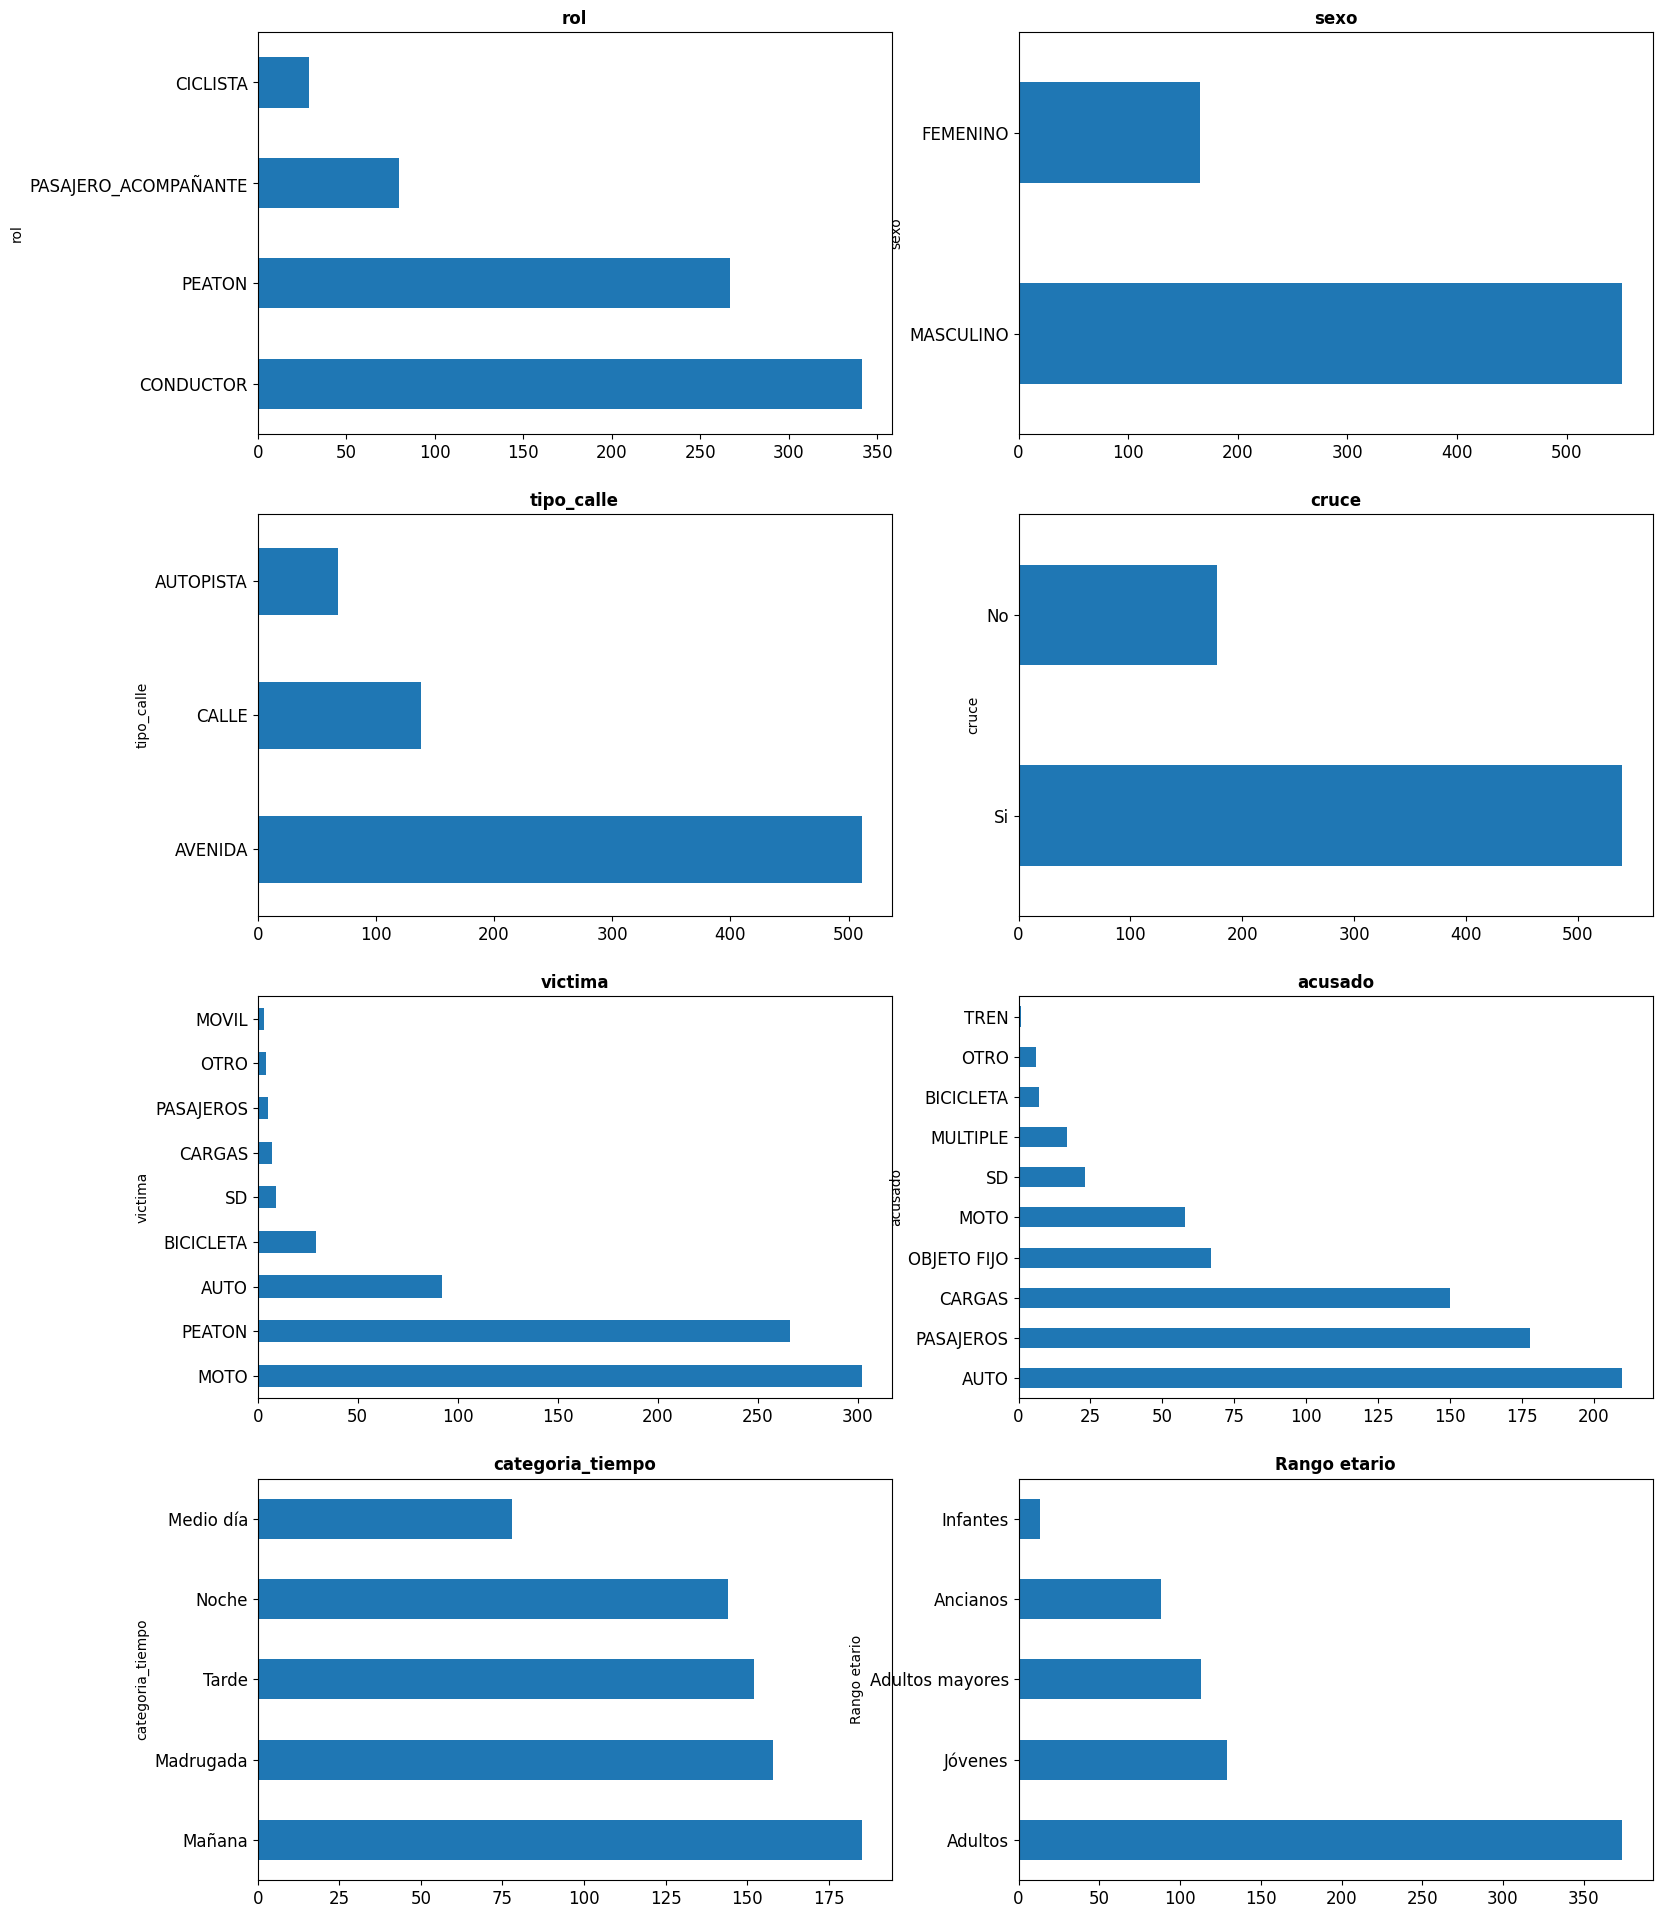

In [566]:
graficos_eda_categoricos(
    homicidios.select_dtypes("O").drop(
        [
            "id",
            "hora",
            "franja_horaria",
            "calle",
            "direccion_normalizada",
            "coordenadas_caba",
            "lugar_hecho",
            "participantes",
            "tipo_dia",
        ],
        axis=1,
    )  # Se seleccionan las columnas cuyo datatype es Object y se excluyen algunas columnas que mostrarían ruido debido a que tienen muchos valores únicos
)



Conclusiones:

* Los roles de victimas con mayores casos de accidentes son Conductores y Peatones. Siendo mayormente conductores de MOTOS 
* El sexo masculino presenta mas del doble de victimas que el sexo femenino.
* Los accidentes en su mayoría se presentan en avenidas y cruces.
* Los acusados son AUTOS, PASAJEROS o CARGAS principalmente.
* El momento del dia 'Mañana' cuenta con el mayor numero de accidentes.

### Cantidad de casos mensuales por año.

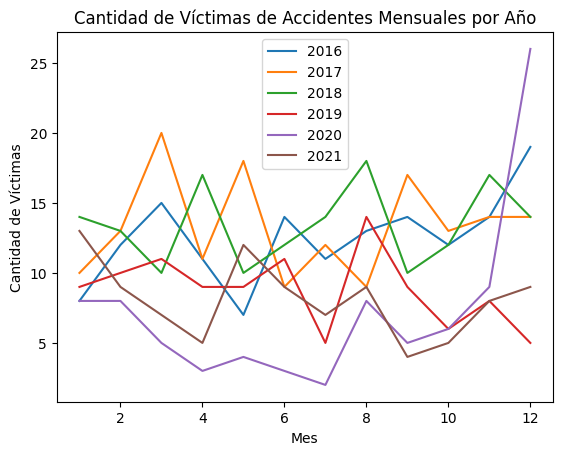

In [536]:
import matplotlib.pyplot as plt

def plot_victimas_por_mes(df):
    # Extraer los años únicos presentes en la columna 'Año'
    years = df['anio'].unique()

    # Crear un gráfico de líneas para cada año
    for year in years:
        # Filtrar el DataFrame por el año actual
        year_df = df[df['anio'] == year]

        # Calcular la cantidad de víctimas por mes
        victims_per_month = year_df.groupby('mes')['cantidad_victimas'].sum()

        # Crear el gráfico de líneas
        plt.plot(victims_per_month.index, victims_per_month.values, label=str(year))

    # Configurar el gráfico
    plt.xlabel('Mes')
    plt.ylabel('Cantidad de Víctimas')
    plt.title('Cantidad de Víctimas de Accidentes Mensuales por Año')
    plt.legend()

    # Mostrar el gráfico
    plt.show()

# Llamar a la función con el DataFrame que contiene los datos de accidentes
plot_victimas_por_mes(homicidios)

In [537]:
def accidentes_mensuales(df, col_anio, col_mes):
    """
    Crea gráficos de línea para la cantidad de víctimas de accidentes mensuales por año.

    Esta función toma un DataFrame que contiene datos de accidentes, extrae los años únicos
    presentes en la columna 'Año', y crea gráficos de línea para la cantidad de víctimas por mes
    para cada año. Los gráficos se organizan en una cuadrícula de subgráficos de 2x3.

    Parameters:
        df (pandas.DataFrame): El DataFrame que contiene los datos de accidentes, con una columna 'Año'.

    Returns:
        None
    """
    # Se obtiene una lista de años únicos
    años = df[col_anio].unique()

    # Se define el número de filas y columnas para la cuadrícula de subgráficos
    n_filas = 3
    n_columnas = 2

    # Se crea una figura con subgráficos en una cuadrícula de 2x3
    fig, axes = plt.subplots(n_filas, n_columnas, figsize=(14, 8))

    # Se itera a través de los años y crea un gráfico por año
    for i, year in enumerate(años):
        fila = i // n_columnas
        columna = i % n_columnas

        # Se filtran los datos para el año actual y agrupa por mes
        data_mensual = (
            df[df[col_anio] == year].groupby(col_mes).agg({"cantidad_victimas": "sum"})
        )

        # Se configura el subgráfico actual
        ax = axes[fila, columna]
        data_mensual.plot(ax=ax, kind="line")
        ax.set_title("Año " + str(year))
        ax.set_xlabel("Mes")
        ax.set_ylabel("Cantidad de Víctimas")
        ax.legend_ = None

    # Se muestra y acomoda el gráfico
    plt.tight_layout()
    plt.show()

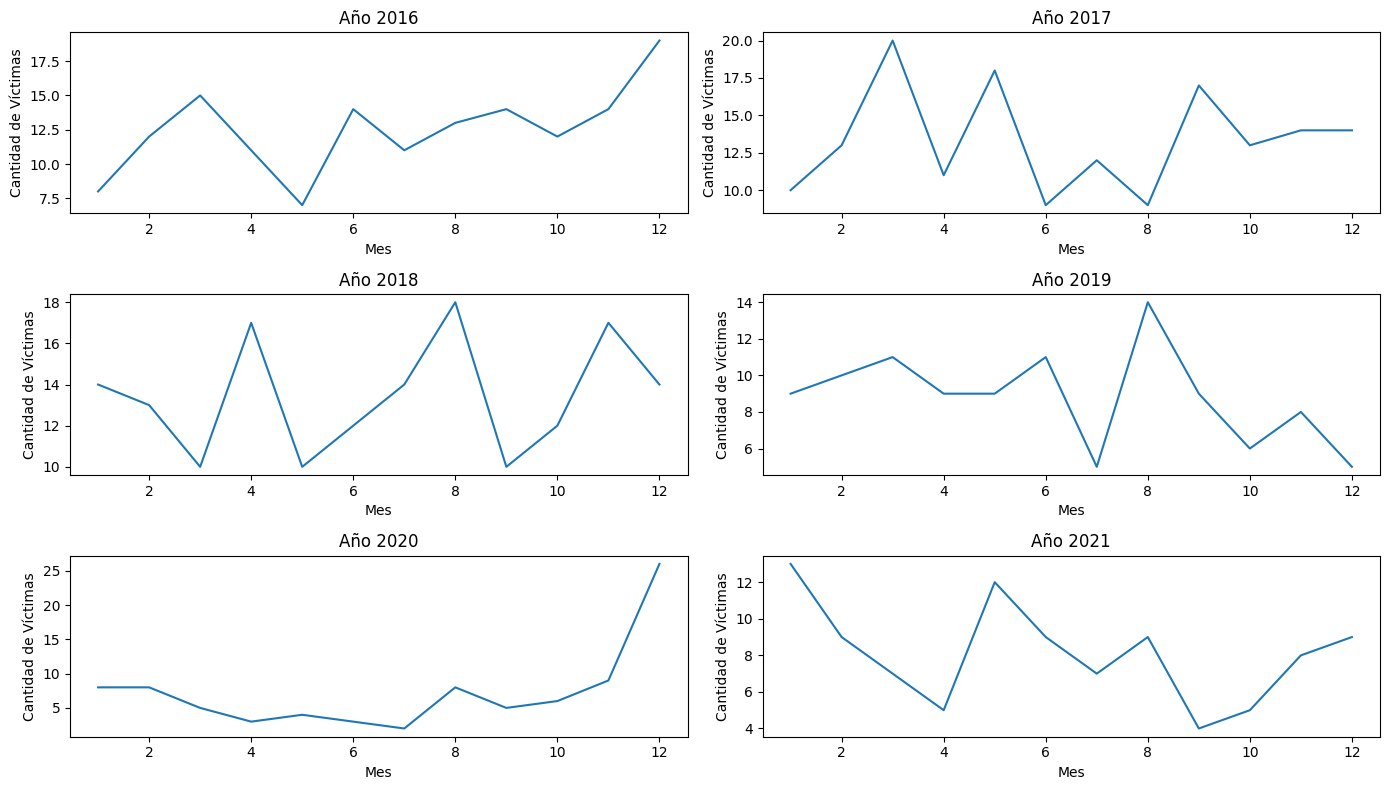

In [538]:
accidentes_mensuales(homicidios, "anio", "mes")

Conclusiones: 

* No se observa un patrón a lo largo del año comparando entre los distintos años. Los picos de accidentes fatales no se observan en los mismos meses en los distintos años registrados.
* Hay disminución notable de accidentes fatales desde Diciembre de 2019 hasta Noviembre de 2020, relacionado con las medidas de cuarentena por la pandemia COVID-19 en Argentina.

### Cantidad de casos total cada mes entre 2016 y 2021

In [539]:
def cantidad_victimas_mensuales(df, col_mes):
    """
    Crea un gráfico de barras que muestra la cantidad de víctimas de accidentes por mes.

    Esta función toma un DataFrame que contiene datos de accidentes, agrupa los datos por mes
    y calcula la cantidad total de víctimas por mes. Luego, crea un gráfico de barras que muestra
    la cantidad de víctimas para cada mes.

    Parameters:
        df (pandas.DataFrame): El DataFrame que contiene los datos de accidentes con una columna 'Mes'.

    Returns:
        None
    """
    # Se agrupa por la cantidad de víctimas por mes
    data = df.groupby(col_mes).agg({"cantidad_victimas": "sum"}).reset_index()

    # Se grafica
    plt.figure(figsize=(7, 7))
    ax = sns.barplot(x=col_mes, y="cantidad_victimas", data=data, hue=col_mes)
    ax.set_title("Cantidad de víctimas por mes")
    ax.set_xlabel("Mes")
    ax.set_ylabel("Cantidad accidentes")

    # Se imprime resumen
    print(f"El mes con menor cantidad de víctimas tiene {data.min()[1]} víctimas")
    print(f"El mes con mayor cantidad de víctimas tiene {data.max()[1]} víctimas")

    # Se muestra el gráfico
    plt.show()

El mes con menor cantidad de víctimas tiene 51 víctimas
El mes con mayor cantidad de víctimas tiene 87 víctimas


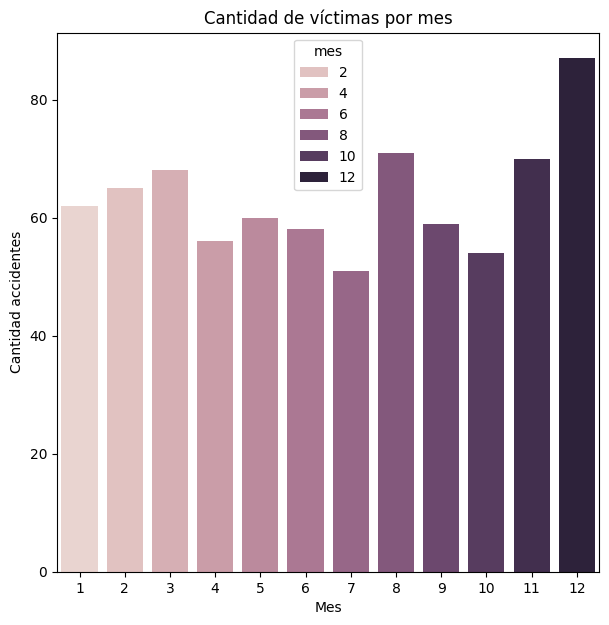

In [540]:
cantidad_victimas_mensuales(homicidios, "mes")

Conclusión:

* Si se considera la distribución anual de todos los registros disponibles, se puede observar que el patrón que existe a lo largo del año es un pico de accidentes en el mes de diciembre. Esto debido potencialmente a las festividades. El mes con menos cantidad de accidentes fatales registrados es julio y octubre. 


### Distribución por momento del día

Para este análisis se creó una nueva columna donde se caracterizaran los diferentes momentos del día con el siguiente criterio:

* **Mañana**: de 6:00 a 10:59
* **Medio día**: de 11:00 a 13:59
* **Tarde**: de 14:00 a 18:59
* **Noche**: de 19:00 a 23:59
* **Madrugada**: de 24:00 a 05:59

A continuación, se observa la distribución de la cantidad de accidentes en cada una de estas categorías.

In [541]:
def crea_categoria_momento_dia(hora):
    """
    Devuelve la categoría de tiempo correspondiente a la hora proporcionada.

    Parameters:
      hora: La hora a clasificar.

    Returns:
      La categoría de tiempo correspondiente.
    """
    if hora.hour >= 6 and hora.hour <= 10:
        return "Mañana"
    elif hora.hour >= 11 and hora.hour <= 13:
        return "Medio día"
    elif hora.hour >= 14 and hora.hour <= 18:
        return "Tarde"
    elif hora.hour >= 19 and hora.hour <= 23:
        return "Noche"
    else:
        return "Madrugada"

In [542]:
def cantidad_accidentes_por_categoria_tiempo(df):
    """
    Calcula la cantidad_accidentes por categoría de tiempo y muestra un gráfico de barras.

    Esta función toma un DataFrame que contiene una columna 'hora' y utiliza la función
    'crea_categoria_momento_dia' para crear la columna 'categoria_tiempo'. Luego, cuenta
    la cantidad_accidentes por cada categoría de tiempo, calcula los porcentajes y
    genera un gráfico de barras que muestra la distribución de accidentes por categoría de tiempo.

    Parameters:
        df (pandas.DataFrame): El DataFrame que contiene la información de los accidentes.

    Returns:
        None
    """
    # Se aplica la función crea_categoria_momento_dia para crear la columna 'categoria_tiempo'
    df["categoria_tiempo"] = df["hora"].apply(crea_categoria_momento_dia)

    # Se cuenta la cantidad_accidentes por categoría de tiempo
    data = df["categoria_tiempo"].value_counts().reset_index()
    data.columns = ["categoria_tiempo", "cantidad_accidentes"]

    # Se calculan los porcentajes
    total_accidentes = data["cantidad_accidentes"].sum()
    data["Porcentaje"] = (data["cantidad_accidentes"] / total_accidentes) * 100

    # Se crea el gráfico de barras
    plt.figure(figsize=(6, 4))
    ax = sns.barplot(
        x="categoria_tiempo", y="cantidad_accidentes", data=data, hue="categoria_tiempo"
    )

    ax.set_title("Cantidad accidentes por categoría de tiempo")
    ax.set_xlabel("Categoría de Tiempo")
    ax.set_ylabel("Cantidad accidentes")

    # Se agrega las cantidades en las barras
    for index, row in data.iterrows():
        ax.annotate(
            f'{row["cantidad_accidentes"]}',
            (index, row["cantidad_accidentes"]),
            ha="center",
            va="bottom",
        )

    # Se muestra el gráfico
    plt.show()


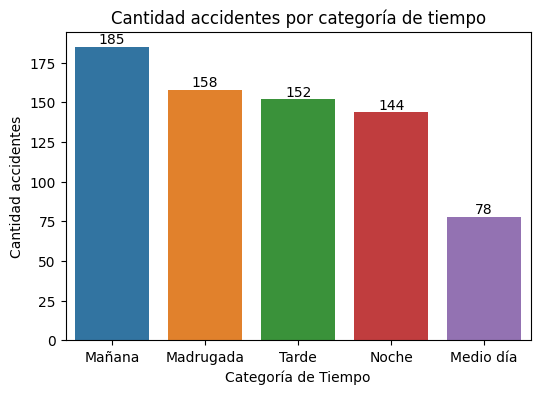

In [543]:
cantidad_accidentes_por_categoria_tiempo(homicidios)

Conclusiones:

* Se pueden apreciar que la mayor parte de los accidentes ocurren durante la mañana, donde la actividad vial es alta. En el mediodía se registra un porcentaje considerablemente menor de cantidad de accidentes fatales respecto a los otros momentos del día.

Ahora, para mayor detalle, se observa la distribución horaria de los accidentes.

In [544]:
def cantidad_accidentes_por_horas_del_dia(df):
    """
    Genera un gráfico de barras que muestra la cantidad_accidentes por hora_del_dia.

    Parameters:
        df: El conjunto de datos de accidentes.

    Returns:
        Un gráfico de barras.
    """
    # Se extrae la hora_del_dia de la columna 'hora'
    df["hora_del_dia"] = df["hora"].apply(lambda x: x.hour)

    # Se cuenta la cantidad_accidentes por hora_del_dia
    data = df["hora_del_dia"].value_counts().reset_index()
    data.columns = ["hora_del_dia", "cantidad_accidentes"]

    # Se ordena los datos por hora_del_dia
    data = data.sort_values(by="hora_del_dia")

    # Se crea el gráfico de barras
    plt.figure(figsize=(12, 5))
    ax = sns.barplot(
        x="hora_del_dia", y="cantidad_accidentes", data=data, hue="cantidad_accidentes"
    )

    ax.set_title("Cantidad accidentes por hora del día")
    ax.set_xlabel("Hora del día")
    ax.set_ylabel("Cantidad accidentes")

    # Se agrega las cantidades en las barras
    for index, row in data.iterrows():
        ax.annotate(
            f'{row["cantidad_accidentes"]}',
            (row["hora_del_dia"], row["cantidad_accidentes"]),
            ha="center",
            va="bottom",
        )

    # Se muestra el gráfico
    plt.show()


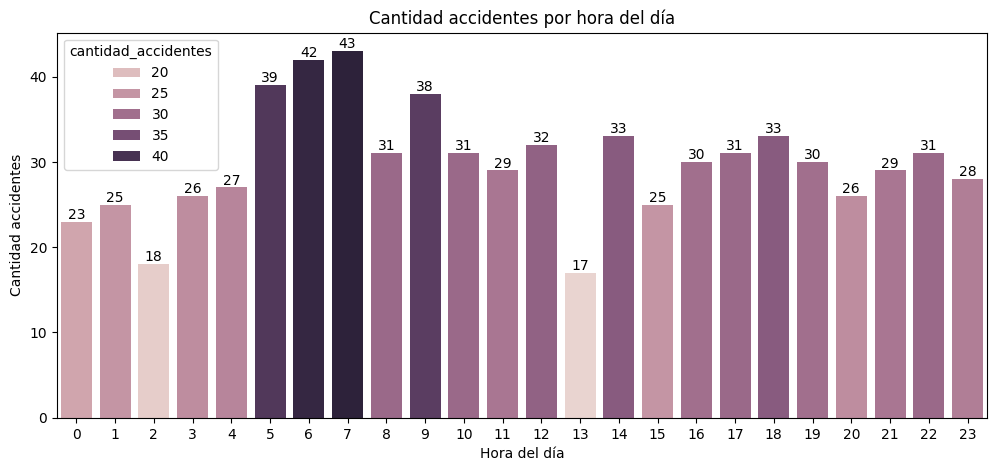

In [545]:
cantidad_accidentes_por_horas_del_dia(homicidios)

Conclusiones:

* Se observa un comportamiento casi bimodal durante el día, presentándose mayor número de accidentes en las franjas horarias de 5-7 y 17-19.
* Se presentan un pico de accidentes a las 14 horas.

### Cantidad de casos por momento de la semana (Día de semana y fin de semana).

In [546]:
def cantidad_accidentes_semana_fin_de_semana(df):
    """
    Genera un gráfico de barras que muestra la cantidad_accidentes por tipo_dia (semana o fin_semana).

    Parameters:
        df: El conjunto de datos de accidentes.

    Returns:
        Un gráfico de barras.
    """
    # Se convierte la columna 'fecha' a tipo de dato datetime
    df["fecha"] = pd.to_datetime(df["fecha"])

    # Se extrae el día de la semana (0 = lunes, 6 = domingo)
    df["dia_semana"] = df["fecha"].dt.dayofweek

    # Se crea una columna 'tipo_dia' para diferenciar entre semana y fin_semana
    df["tipo_dia"] = df["dia_semana"].apply(
        lambda x: "fin_semana" if x >= 5 else "Semana"
    )

    # Se cuenta la cantidad_accidentes por tipo_dia
    data = df["tipo_dia"].value_counts().reset_index()
    data.columns = ["tipo_dia", "cantidad_accidentes"]

    # Se crea el gráfico de barras
    plt.figure(figsize=(6, 4))
    ax = sns.barplot(x="tipo_dia", y="cantidad_accidentes", data=data, hue="tipo_dia")

    ax.set_title("Cantidad accidentes por tipo de día")
    ax.set_xlabel("Tipo de día")
    ax.set_ylabel("Cantidad de accidentes")

    # Se agrega las cantidades en las barras
    for index, row in data.iterrows():
        ax.annotate(
            f'{row["cantidad_accidentes"]}',
            (index, row["cantidad_accidentes"]),
            ha="center",
            va="bottom",
        )

    # Se muestra el gráfico
    plt.show()

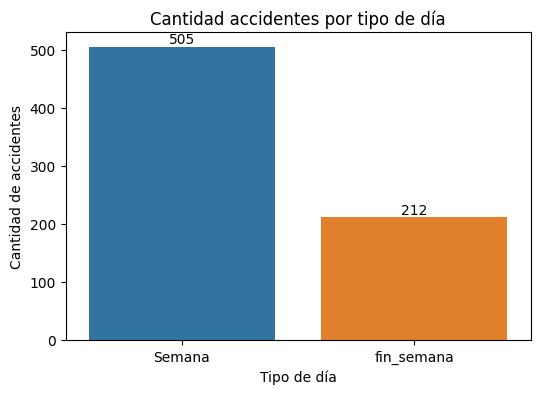

In [547]:
cantidad_accidentes_semana_fin_de_semana(homicidios)

Conclusiones:

* Entre semana se presenta un gran número de accidentes, pero puede ser engañosa la gráfica, ya que se debe tener en cuenta que se comparan 2 días de la semana contra 5, y el número de accidentes en fin de semana representan casi la mitad de los accidentes de toda la semana hábil

### Cantidad de víctimas por edades

En este apartado se analizan las cantidades de datos por edades, las cuales para un mejor análisis fueron divididas en los siguientes rangos etarios:


* **Infantes**: edades menores a 15 años.
* **Jóvenes**: edades entre 16 y 25 años.
* **Adultos**: edades entre 26 y 50 años.
* **Adultos mayores**: edades entre 51 y 70 años.
* **Ancianos**: edades mayores a 71 años.

In [548]:
def rango_etario(edad):
    """
    Devuelve el rango etario correspondiente a una edad.

    Args:
        edad: La edad de la víctima.

    Returns:
        El rango etario de la víctima.
    """

    if edad <= 15:
        return 'Infantes'
    elif edad >= 16 and edad <= 25:
        return 'Jóvenes'
    elif edad >= 26 and edad <= 50:
        return 'Adultos'
    elif edad >= 51 and edad <= 70:
        return 'Adultos mayores'
    else:
        return 'Ancianos'

In [549]:
def victimas_por_rango_etario(df):
    """
    Crea una nueva columna llamada 'Rango etario' en el dataframe recibido, 
    y luego crea un gráfico de barras para mostrar la cantidad de víctimas registradas por rango etario.

    Args:
        df: El dataframe a procesar.

    Returns:
        El gráfico de barras creado.
    """

    # se crea una nueva columna llamada 'Rango etario'

    df['Rango etario'] = df['edad'].apply(lambda edad: rango_etario(edad))

    # Se agrupan los registros por rango etario

    grupos = df.groupby('Rango etario')
       
    # Se crea un gráfico de barras

    return grupos['edad'].size().plot.bar(figsize=(10, 6), color=['red', 'green', 'blue', 'orange', 'purple'],
                                           xlabel= 'Rango etario', ylabel='Cantidad de registros')

<Axes: xlabel='Rango etario', ylabel='Cantidad de registros'>

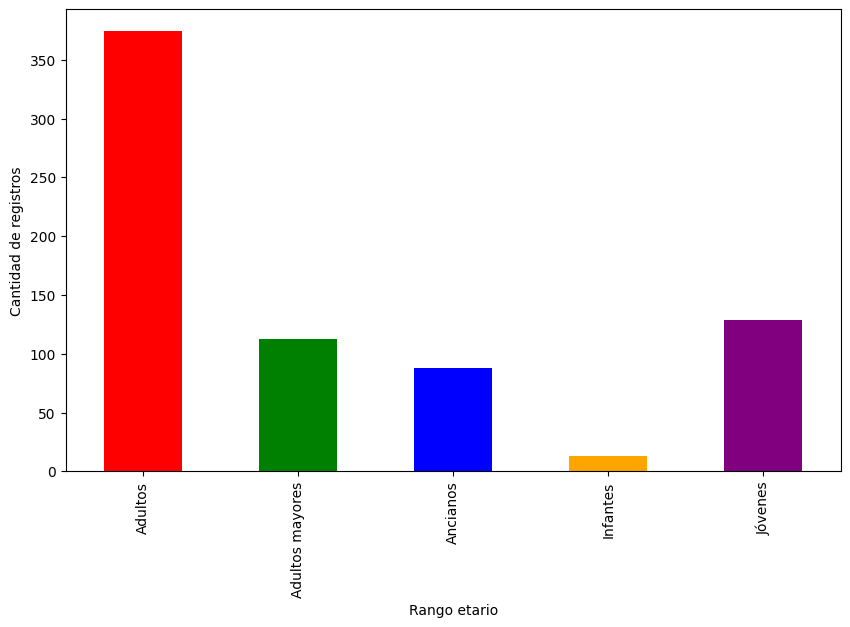

In [550]:
victimas_por_rango_etario(homicidios)

Conclusiones:

* En el gráfico anterior podemos visualizar que la categoría Adultos contiene la gran mayoría de los casos de accidentes

### Cantidad de víctimas según Sexo.

En este apartado se analiza la relación del sexo con la cantidad de accidentes, los roles y el tipo de vehículo que ocupaba o si era peatón.

In [551]:
def cantidad_victimas_sexo_rol_victima(df):
    """
    Genera un resumen de la cantidad de víctimas por sexo, rol y tipo de vehículo en un accidente de tráfico.

    Esta función toma un DataFrame como entrada y genera un resumen que incluye:

    * Gráficos de barras que muestran la cantidad de víctimas por sexo, rol y tipo de vehículo en orden descendente.
    * DataFrames que muestran la cantidad y el porcentaje de víctimas por sexo, rol y tipo de vehículo.

    Parameters:
        df (pandas.DataFrame): El DataFrame que se va a analizar.

    Returns:
        None
    """
    # Se crea el gráfico
    fig, axes = plt.subplots(1, 3, figsize=(15, 4))

    # Gráfico 1: Sexo
    sns.countplot(data=df, x="sexo", ax=axes[0], hue="sexo")
    axes[0].set_title("Cantidad de víctimas por sexo")
    axes[0].set_ylabel("Cantidad de víctimas")

    # Se define una paleta de colores personalizada (invierte los colores)
    colores_por_defecto = sns.color_palette()
    colores_invertidos = [colores_por_defecto[1], colores_por_defecto[0]]

    # Gráfico 2: Rol
    df_rol = df.groupby(["rol", "sexo"]).size().unstack(fill_value=0)
    df_rol.plot(kind="bar", stacked=True, ax=axes[1], color=colores_invertidos)
    axes[1].set_title("Cantidad de víctimas por rol")
    axes[1].set_ylabel("Cantidad de víctimas")
    axes[1].tick_params(axis="x", rotation=45)
    axes[1].legend().set_visible(False)

    # Gráfico 3: Tipo de vehículo
    df_victima = df.groupby(["victima", "sexo"]).size().unstack(fill_value=0)
    df_victima.plot(kind="bar", stacked=True, ax=axes[2], color=colores_invertidos)
    axes[2].set_title("Cantidad de víctimas por tipo de vehículo")
    axes[2].set_ylabel("Cantidad de víctimas")
    axes[2].tick_params(axis="x", rotation=45)
    axes[2].legend().set_visible(False)

    # Se muestran los gráficos
    plt.show()

    # # Se calcula la cantidad de víctimas por sexo
    # sexo_counts = df['Sexo'].value_counts().reset_index()
    # sexo_counts.columns = ['Sexo', 'Cantidad de víctimas']

    # # Se calcula el porcentaje de víctimas por sexo
    # total_victimas_sexo = sexo_counts['Cantidad de víctimas'].sum()
    # sexo_counts['Porcentaje de víctimas'] = (sexo_counts['Cantidad de víctimas'] / total_victimas_sexo) * 100

    # # Se crea el DataFrame para sexo
    # df_sexo = pd.DataFrame(sexo_counts)
    # print('Resumen para Sexo:')
    # print(df_sexo)

    # # Se calcula la cantidad de víctimas por rol y sexo
    # df_rol = df.groupby(['Rol', 'Sexo']).size().unstack(fill_value=0)

    # # Se calcula el porcentaje de víctimas por rol y sexo
    # total_victimas_rol = df_rol.sum(axis=1)
    # df_rol_porcentaje = df_rol.divide(total_victimas_rol, axis=0) * 100

    # # Se renombra las columnas para el DataFrame de porcentaje
    # df_rol_porcentaje.columns = [f"Porcentaje de víctimas {col}" for col in df_rol_porcentaje.columns]

    # # Se combinan los DataFrames de cantidad y porcentaje
    # df_rol = pd.concat([df_rol, df_rol_porcentaje], axis=1)
    # print('Resumen para Rol:')
    # print(df_rol)

    # # Se calcula la cantidad de víctimas por tipo de vehículo
    # tipo_vehiculo_counts = df['Víctima'].value_counts().reset_index()
    # tipo_vehiculo_counts.columns = ['Tipo de Vehículo', 'Cantidad de víctimas']

    # # Se calcula el porcentaje de víctimas por tipo de vehículo
    # total_victimas = tipo_vehiculo_counts['Cantidad de víctimas'].sum()
    # tipo_vehiculo_counts['Porcentaje de víctimas'] = round((tipo_vehiculo_counts['Cantidad de víctimas'] / total_victimas) * 100,2)

    # # Se crea un DataFrame con la cantidad y porcentaje de víctimas por tipo de vehículo
    # df_tipo_vehiculo = pd.DataFrame(tipo_vehiculo_counts)
    # print('Resumen para Tipo de vehículo:')
    # print(df_tipo_vehiculo)

    # # Se calcula la cantidad de víctimas por tipo de vehículo y sexo
    # tipo_vehiculo_sexo_counts = df.groupby(['Víctima', 'Sexo']).size().unstack(fill_value=0).reset_index()
    # tipo_vehiculo_sexo_counts.columns = ['Tipo de Vehículo', 'Mujeres', 'Hombres']

    # # Se calcula la cantidad total de víctimas
    # total_victimas = tipo_vehiculo_sexo_counts[['Hombres', 'Mujeres']].sum(axis=1)

    # # se agregan las columnas de cantidad total y porcentaje
    # tipo_vehiculo_sexo_counts['Cantidad Total'] = total_victimas
    # tipo_vehiculo_sexo_counts['Porcentaje Hombres'] = (tipo_vehiculo_sexo_counts['Hombres'] / total_victimas) * 100
    # tipo_vehiculo_sexo_counts['Porcentaje Mujeres'] = (tipo_vehiculo_sexo_counts['Mujeres'] / total_victimas) * 100

    # # Se imprimen resumenes
    # print("Resumen de víctimas por tipo de vehículo y sexo:")
    # print(tipo_vehiculo_sexo_counts)


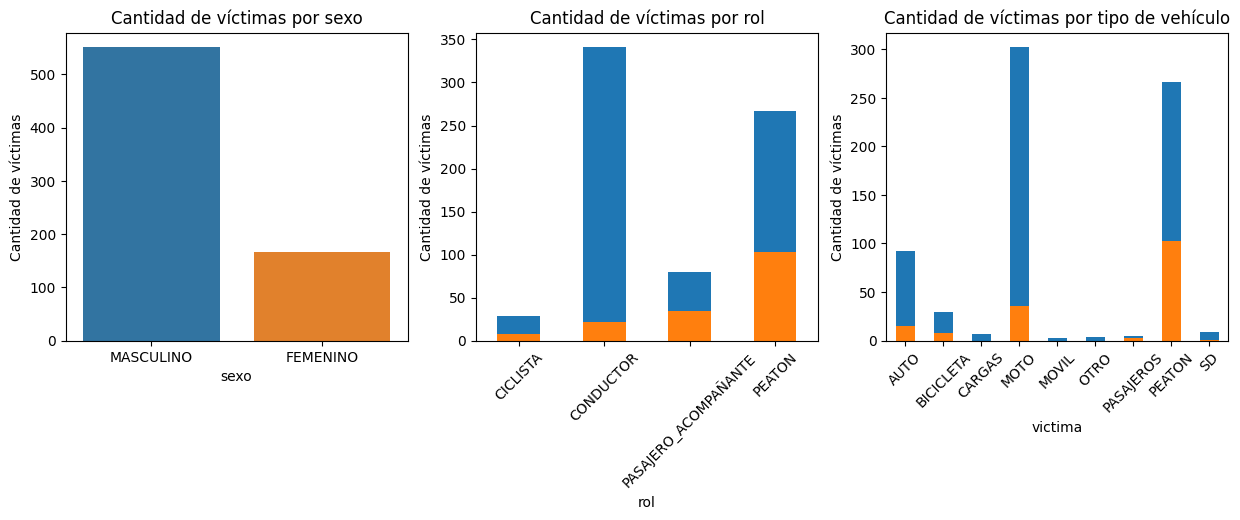

In [552]:
cantidad_victimas_sexo_rol_victima(homicidios)

Conclusiones:

* Hay una notoria diferencia entre la cantidad de víctimas masculinas (color azul) por sobre las femeninas (color naranja).
* Se observa una tendencia a que las victimas del sexo masculino sean conductores tanto de autos como de motos
* Las victimas peatonales no tienen una influencia notoria del sexo 

### Cantidad de Acusados

In [553]:
def cantidad_acusados(df):
    """
    Genera un resumen de la cantidad de acusados en un accidente de tráfico.

    Esta función toma un DataFrame como entrada y genera un resumen que incluye:

    * Un gráfico de barras que muestra la cantidad de acusados en orden descendente.
    * Un DataFrame que muestra la cantidad y el porcentaje de acusados.

    Parameters:
        df (pandas.DataFrame): El DataFrame que se va a analizar.

    Returns:
        None
    """
    # Se ordenan los datos por 'Participantes' en orden descendente por cantidad
    ordenado = df["acusado"].value_counts().reset_index()
    ordenado = ordenado.rename(columns={"Cantidad": "acusado"})
    ordenado = ordenado.sort_values(by="count", ascending=False)

    plt.figure(figsize=(15, 4))

    # Crear el gráfico de barras
    ax = sns.barplot(
        data=ordenado, x="acusado", y="count", order=ordenado["acusado"], hue="acusado"
    )
    ax.set_title("Cantidad de acusados en los hechos")
    ax.set_ylabel("Cantidad de acusados")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment="right")

    # Se muestra el gráfico
    plt.show()

    # # Se calcula la cantidad de acusados
    # acusados_counts = df['acusado'].value_counts().reset_index()
    # acusados_counts.columns = ['acusado', 'Cantidad de acusados']

    # # Se calcula el porcentaje de acusados
    # total_acusados = acusados_counts['Cantidad de acusados'].sum()
    # acusados_counts['Porcentaje de acusados'] = round((acusados_counts['Cantidad de acusados'] / total_acusados) * 100,2)

    # # Se ordenan los datos por cantidad de acusados en orden descendente
    # acusados_counts = acusados_counts.sort_values(by='Cantidad de acusados', ascending=False)
    # # Se imprimen resumen
    # print("Resumen de acusados:")
    # print(acusados_counts)


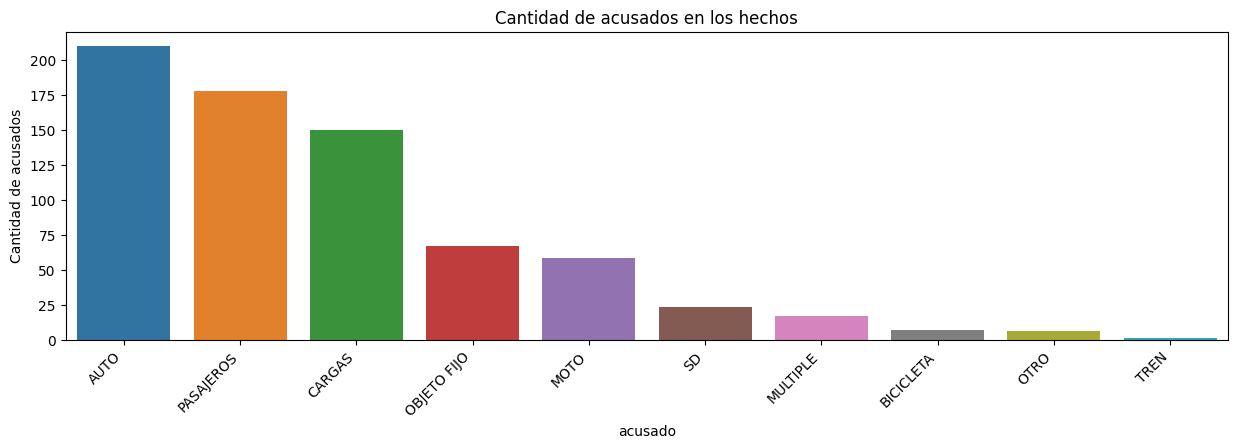

In [554]:
cantidad_acusados(homicidios)

Conclusiones:

* La mayor parte de acusados está representada por los conductores de autos
* Los pasajeros representan culpabilidad de un transporte público. El hecho esta asociado a una persona que subía, bajaba o se trasladaba por este tipo de medios.

### Tipo de calle donde ocurren los accidentes viales

In [555]:
def accidentes_tipo_de_calle(df):
    """
    Genera un resumen de los accidentes de tráfico por tipo de calle y cruce.

    Esta función toma un DataFrame como entrada y genera un resumen que incluye:

    * Un gráfico de barras que muestra la cantidad de víctimas por tipo de calle.
    * Un gráfico de barras que muestra la cantidad de víctimas en cruces.
    * Un DataFrame que muestra la cantidad y el porcentaje de víctimas por tipo de calle.
    * Un DataFrame que muestra la cantidad y el porcentaje de víctimas en cruces.

    Parameters:
        df (pandas.DataFrame): El DataFrame que se va a analizar.

    Returns:
        None
    """
    # Se crea el gráfico
    fig, axes = plt.subplots(1, 2, figsize=(10, 4))

    sns.countplot(data=df, x="tipo_calle", ax=axes[0], hue="tipo_calle")
    axes[0].set_title("Cantidad de víctimas por tipo de calle")
    axes[0].set_ylabel("Cantidad de víctimas")

    sns.countplot(data=df, x="cruce", ax=axes[1], hue="tipo_calle")
    axes[1].set_title("Cantidad de víctimas en cruces")
    axes[1].set_ylabel("Cantidad de víctimas")

    # Mostramos los gráficos
    plt.show()

    # # Se calcula la cantidad de víctimas por tipo de calle
    # tipo_calle_counts = df['Tipo de calle'].value_counts().reset_index()
    # tipo_calle_counts.columns = ['Tipo de calle', 'Cantidad de víctimas']

    # # Se calcula el porcentaje de víctimas por tipo de calle
    # tipo_calle_counts['Porcentaje de víctimas'] = round((tipo_calle_counts['Cantidad de víctimas'] / tipo_calle_counts['Cantidad de víctimas'].sum()) * 100,2)

    # # Se calcula la cantidad de víctimas por cruce
    # cruce_counts = df['Cruce'].value_counts().reset_index()
    # cruce_counts.columns = ['Cruce', 'Cantidad de víctimas']

    # # Se calcula el porcentaje de víctimas por cruce
    # cruce_counts['Porcentaje de víctimas'] = round((cruce_counts['Cantidad de víctimas'] / cruce_counts['Cantidad de víctimas'].sum()) * 100,2)

    # # Se crean DataFrames para tipo de calle y cruce
    # df_tipo_calle = pd.DataFrame(tipo_calle_counts)
    # df_cruce = pd.DataFrame(cruce_counts)

    # #  Se muestran los DataFrames resultantes
    # print("Resumen por Tipo de Calle:")
    # print(df_tipo_calle)
    # print("\nResumen por Cruce:")
    # print(df_cruce)

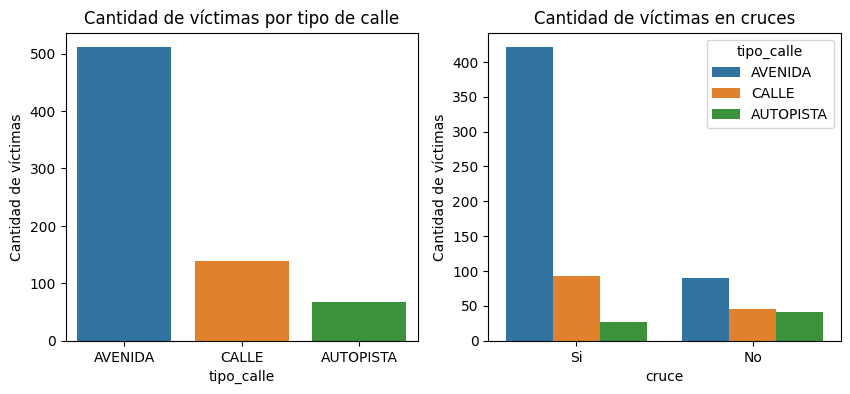

In [556]:
accidentes_tipo_de_calle(homicidios)

Conclusiones:

* La mayor parte de victimas se presenta en Avenidas.
* Se puede ver que cuando se producen accidentes en los cruces, mayormente son en Avenidas.

## Exportar el dataframe resultante

In [557]:
# Se exporta el dataframe a CSV
homicidios.to_csv("01-homicidios.csv", index=False, encoding="utf-8")